# Predicting the Potability of Water Samples

Water plays a key role to every living being in life. Water plays a key role in major bodily functions from the flow of blood in our bodies to maintaining body temperature. Water is also used in several industries such as in food and medicine. Water also provides habitats for several species of animals as both a supply of drinking water as well as a place to live in.

Hence, it is imperative that the water we have at hand is clean and safe to consume, which in today's day and age is not as common as we would think it to be. This project takes samples from several sources of water and focuses on predicting whether a given sample of water is potable or not based on several factors given to us.

In [1]:
library(ggplot2)
library(mice)
library(missForest)
library(randomForest)
library(corrplot)
library(caret)
library(moments)
library(rpart)
library(rpart.plot)
library(pROC)
library(ROCR)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'mice' was built under R version 4.3.3"


Warning message in check_dep_version():
"ABI version mismatch: 
lme4 was built with Matrix ABI version 1
Current Matrix ABI version is 0
Please re-install lme4 from source or restore original 'Matrix' package"

Attaching package: 'mice'


The following object is masked from 'package:stats':

    filter


The following objects are masked from 'package:base':

    cbind, rbind


Warning message:
"package 'missForest' was built under R version 4.3.3"
Warning message:
"package 'randomForest' was built under R version 4.3.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'corrplot' was built under R version 4.3.3"
corrplot 0.92 loaded

Warning message:
"package 'caret' was built under R version 4.3.3"
Loading required package: lattice

Warning message:
"package 'rpart' was built under R version 4.3.3"
Warning message:
"package 'rpar

In [2]:

water.quality <- read.csv('C:/Users/ashis/Downloads/water_potability.csv')
head(water.quality)
summary(water.quality)
nrow(water.quality)
dim(water.quality)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.379783,86.99097,2.963135,0
2,3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.180013,56.32908,4.500656,0
3,8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.868637,66.42009,3.055934,0
4,8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
5,9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0
6,5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0


       ph            Hardness          Solids         Chloramines    
 Min.   : 0.000   Min.   : 47.43   Min.   :  320.9   Min.   : 0.352  
 1st Qu.: 6.093   1st Qu.:176.85   1st Qu.:15666.7   1st Qu.: 6.127  
 Median : 7.037   Median :196.97   Median :20927.8   Median : 7.130  
 Mean   : 7.081   Mean   :196.37   Mean   :22014.1   Mean   : 7.122  
 3rd Qu.: 8.062   3rd Qu.:216.67   3rd Qu.:27332.8   3rd Qu.: 8.115  
 Max.   :14.000   Max.   :323.12   Max.   :61227.2   Max.   :13.127  
 NA's   :491                                                         
    Sulfate       Conductivity   Organic_carbon  Trihalomethanes  
 Min.   :129.0   Min.   :181.5   Min.   : 2.20   Min.   :  0.738  
 1st Qu.:307.7   1st Qu.:365.7   1st Qu.:12.07   1st Qu.: 55.845  
 Median :333.1   Median :421.9   Median :14.22   Median : 66.622  
 Mean   :333.8   Mean   :426.2   Mean   :14.28   Mean   : 66.396  
 3rd Qu.:360.0   3rd Qu.:481.8   3rd Qu.:16.56   3rd Qu.: 77.337  
 Max.   :481.0   Max.   :753.3   Max. 

[1] 3276

[1] 3276   10

In [3]:
sum(apply(water.quality, 1, anyNA))
sum(is.na(water.quality$ph))
sum(is.na(water.quality$Hardness))
sum(is.na(water.quality$Solids))
sum(is.na(water.quality$Chloramines))
sum(is.na(water.quality$Sulfate))
sum(is.na(water.quality$Conductivity))
sum(is.na(water.quality$Organic_carbon))
sum(is.na(water.quality$Trihalomethanes))
sum(is.na(water.quality$Turbidity))
sum(is.na(water.quality$Potability))

[1] 1265

[1] 491

[1] 0

[1] 0

[1] 0

[1] 781

[1] 0

[1] 0

[1] 162

[1] 0

[1] 0

Our dataset has missing values in the pH, Sulfate and trihalomethanes columns. This will have to be either dropped or imputed

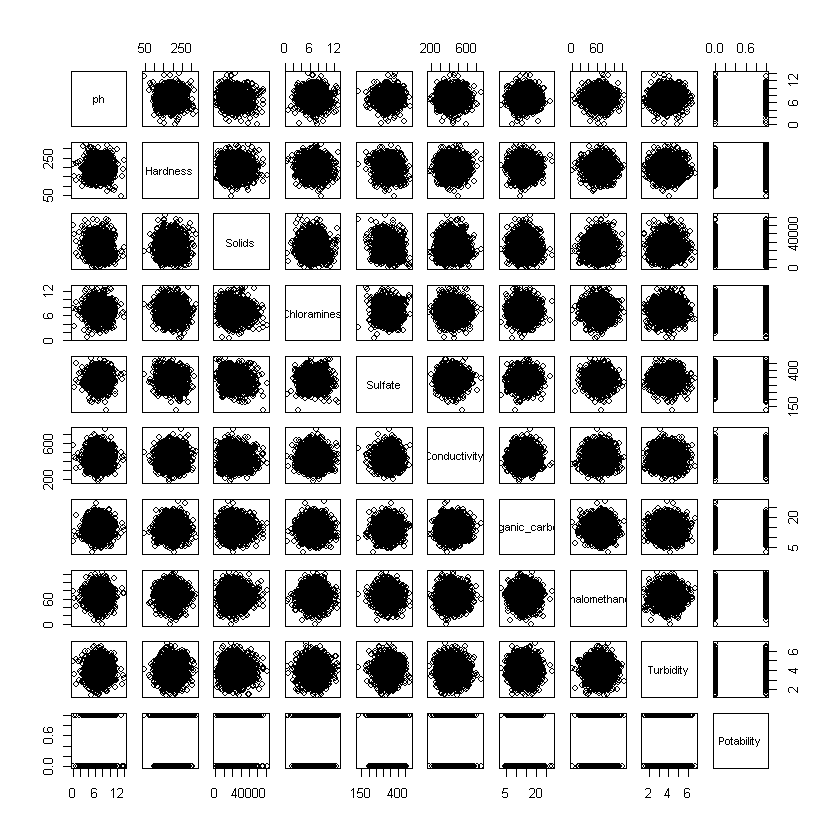

In [4]:
pairs(water.quality)


Since the pH, Sulfate and Trihalomethanes Columns have null values, we have to impute them. For this we make use of the mice package to both visualize and impute the missing data.

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,Trihalomethanes,ph,Sulfate,
2011,1,1,1,1,1,1,1,1,1,1,0
638,1,1,1,1,1,1,1,1,1,0,1
362,1,1,1,1,1,1,1,1,0,1,1
103,1,1,1,1,1,1,1,1,0,0,2
105,1,1,1,1,1,1,1,0,1,1,1
31,1,1,1,1,1,1,1,0,1,0,2
17,1,1,1,1,1,1,1,0,0,1,2
9,1,1,1,1,1,1,1,0,0,0,3
,0,0,0,0,0,0,0,162,491,781,1434


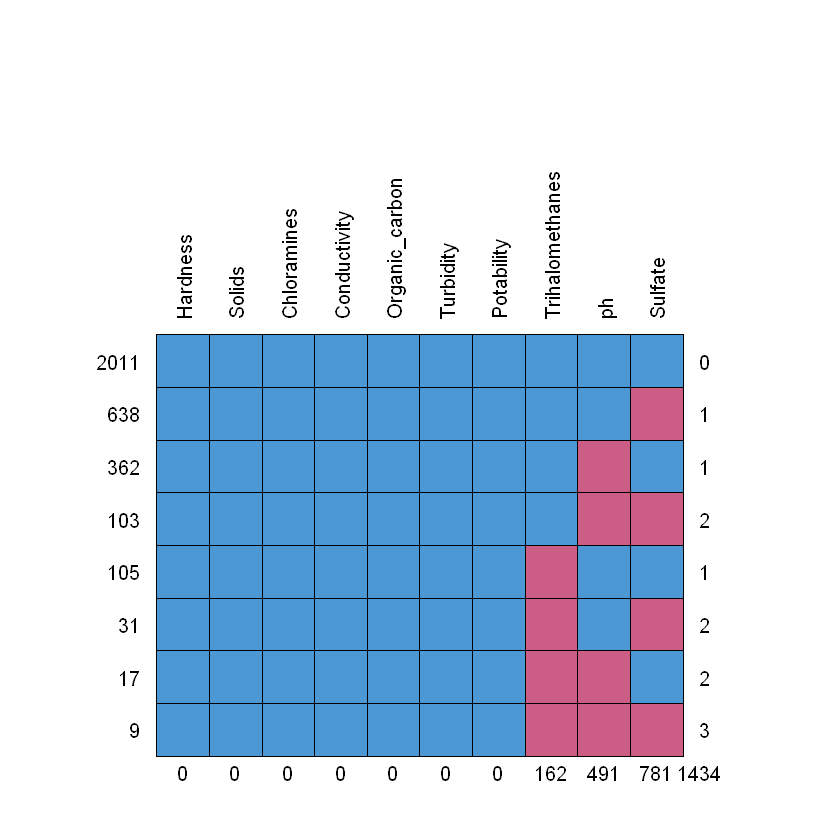

In [5]:
# Impute missing data using mice
md.pattern(water.quality, rotate.names = TRUE)

The above shows us the missing values in our dataset.

Blue means no missing value, and red means missing value.

The numbers on the left show the number of instances of a particular pattern of missing values occurring in the dataset.

The numbers on the right are equal to the number of missing values in each pattern (notice the number of red squares)

The numbers at the bottom record the total number of missing values for each variable

We use the random forest method to to impute the missing data points

In [6]:
# Alternative imputing methods (median, pmm, CART and lasso normalization)
# water.quality$ph[is.na(water.quality$ph)] <- median(water.quality$ph, na.rm = TRUE)
# water.quality$Sulfate[is.na(water.quality$Sulfate)] <- median(water.quality$Sulfate, na.rm = TRUE)
# water.quality$Trihalomethanes[is.na(water.quality$Trihalomethanes)] <- median(water.quality$Trihalomethanes, na.rm = TRUE)

# water.quality <- complete(mice(water.quality, method="pmm"))
# water.quality <- complete(mice(water.quality, method="cart"))
# water.quality <- complete(mice(water.quality, method="lasso.norm"))

water.quality_original <- water.quality

Random.seed <- c("Mersenne-Twister", 530)
set.seed(530)
imputation_result <- missForest(water.quality, xtrue = water.quality_original)
water.quality <- imputation_result$ximp


This package iteratively applies the random forest model on our dataset taking the missing values as the Y variables.

The stopping criterion for this method is: when the value differences in each iteration of the random forest implementation goes up, the second last matrix obtained will be taken into consideration.

The **Normalized Root Mean Square Error (NRMSE)** is the error between hte imputed values at the stopping point and is shown below.

In [7]:
imputation_result$OOBerror

NRMSE 
0.001829842

Hence, we have a look at the dataset after this process to confirm that all the data has been imputed.

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,
3276,1,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,0


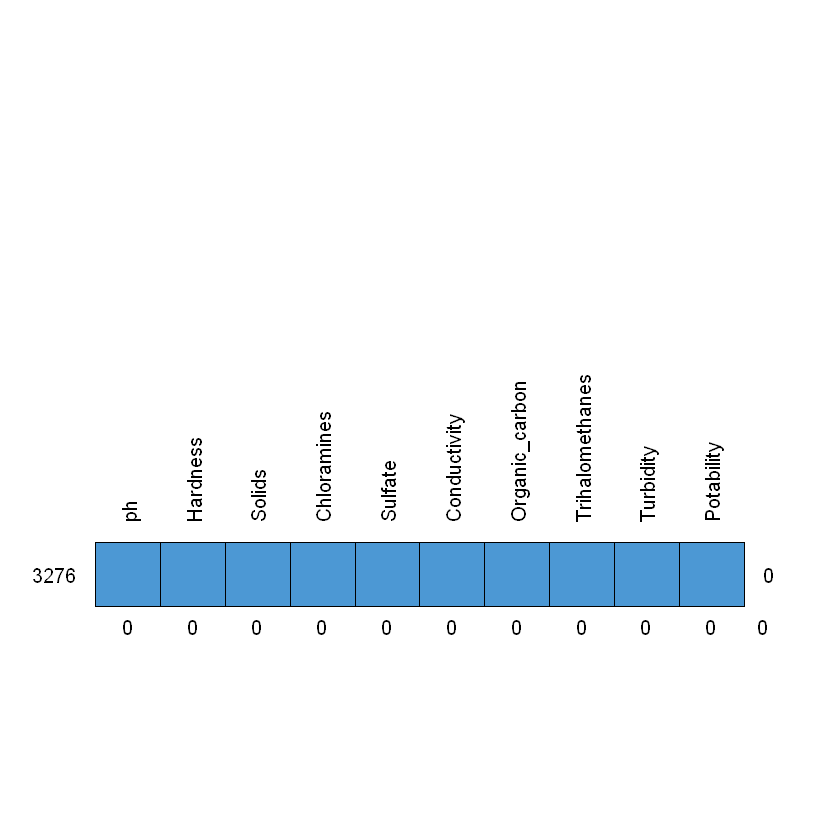

In [8]:
md.pattern(water.quality, rotate.names = TRUE)

# Exploratory Data Analysis

We will first be looking into the description of how our dataset is in terms of potable and not-potable water.

Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


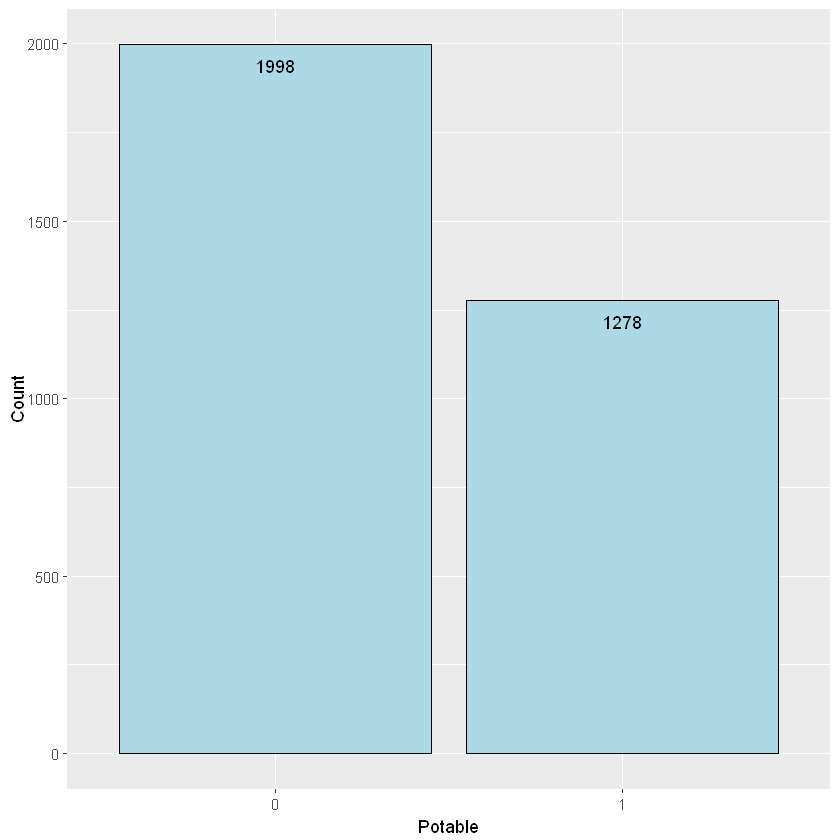

In [9]:
ggplot(water.quality) + geom_bar(aes(x = factor(Potability)), fill='lightblue', color='black', stat='count') +
  geom_text(stat='count',aes(x = factor(Potability), label=..count..), vjust=2) +
  xlab('Potable') + ylab('Count')

In [10]:
print("Non-Potable")
summary(subset(water.quality, Potability == 0))
print("Potable")
summary(subset(water.quality, Potability == 1))

[1] "Non-Potable"


       ph            Hardness          Solids         Chloramines    
 Min.   : 0.000   Min.   : 98.45   Min.   :  320.9   Min.   : 1.684  
 1st Qu.: 6.175   1st Qu.:177.82   1st Qu.:15663.1   1st Qu.: 6.156  
 Median : 7.079   Median :197.12   Median :20809.6   Median : 7.090  
 Mean   : 7.091   Mean   :196.73   Mean   :21777.5   Mean   : 7.092  
 3rd Qu.: 7.985   3rd Qu.:216.12   3rd Qu.:27006.2   3rd Qu.: 8.066  
 Max.   :14.000   Max.   :304.24   Max.   :61227.2   Max.   :12.653  
    Sulfate       Conductivity   Organic_carbon   Trihalomethanes  
 Min.   :203.4   Min.   :181.5   Min.   : 4.372   Min.   :  0.738  
 1st Qu.:317.1   1st Qu.:368.5   1st Qu.:12.101   1st Qu.: 56.442  
 Median :333.6   Median :422.2   Median :14.294   Median : 66.418  
 Mean   :334.5   Mean   :426.7   Mean   :14.364   Mean   : 66.318  
 3rd Qu.:350.7   3rd Qu.:480.7   3rd Qu.:16.649   3rd Qu.: 76.538  
 Max.   :460.1   Max.   :753.3   Max.   :28.300   Max.   :120.030  
   Turbidity       Potability
 Min

[1] "Potable"


       ph             Hardness          Solids         Chloramines    
 Min.   : 0.2275   Min.   : 47.43   Min.   :  728.8   Min.   : 0.352  
 1st Qu.: 6.3478   1st Qu.:174.33   1st Qu.:15669.0   1st Qu.: 6.094  
 Median : 7.0455   Median :196.63   Median :21199.4   Median : 7.215  
 Mean   : 7.0736   Mean   :195.80   Mean   :22384.0   Mean   : 7.169  
 3rd Qu.: 7.7865   3rd Qu.:218.00   3rd Qu.:27973.2   3rd Qu.: 8.199  
 Max.   :13.1754   Max.   :323.12   Max.   :56488.7   Max.   :13.127  
    Sulfate       Conductivity   Organic_carbon  Trihalomethanes  
 Min.   :129.0   Min.   :201.6   Min.   : 2.20   Min.   :  8.176  
 1st Qu.:310.6   1st Qu.:360.9   1st Qu.:12.03   1st Qu.: 56.911  
 Median :333.3   Median :420.7   Median :14.16   Median : 66.718  
 Mean   :332.7   Mean   :425.4   Mean   :14.16   Mean   : 66.557  
 3rd Qu.:356.4   3rd Qu.:484.2   3rd Qu.:16.36   3rd Qu.: 77.067  
 Max.   :481.0   Max.   :695.4   Max.   :23.60   Max.   :124.000  
   Turbidity       Potability
 Min

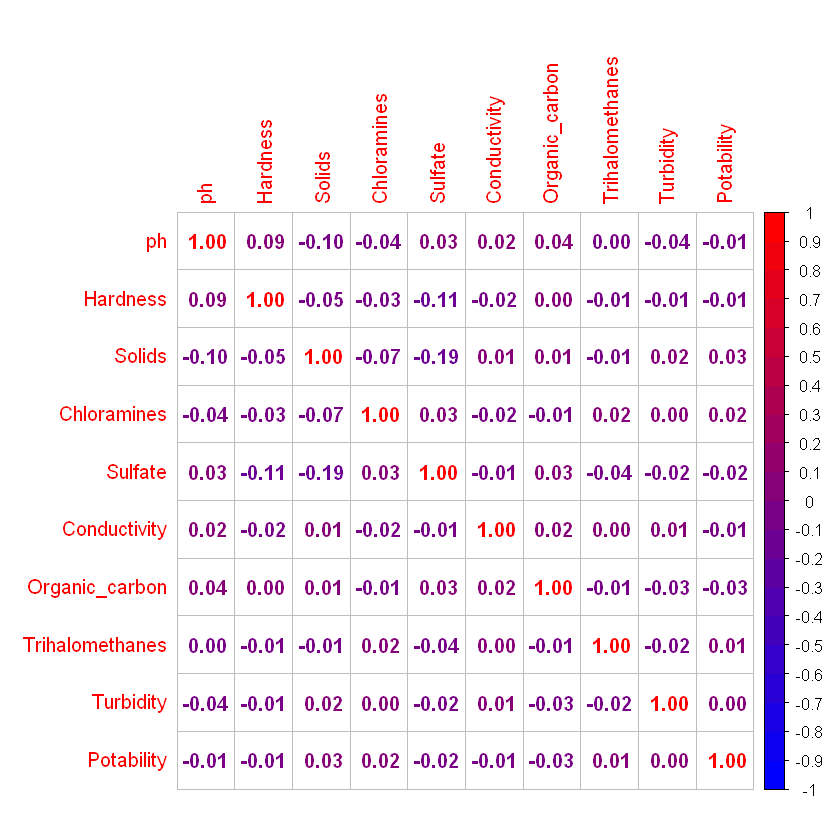

In [11]:
correlations <- cor(water.quality)
corrplot(correlations, method="number", col=colorRampPalette(c("blue","red"))(20))


All the features have very weak correlations with one another. Hence they are independent of one another.

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


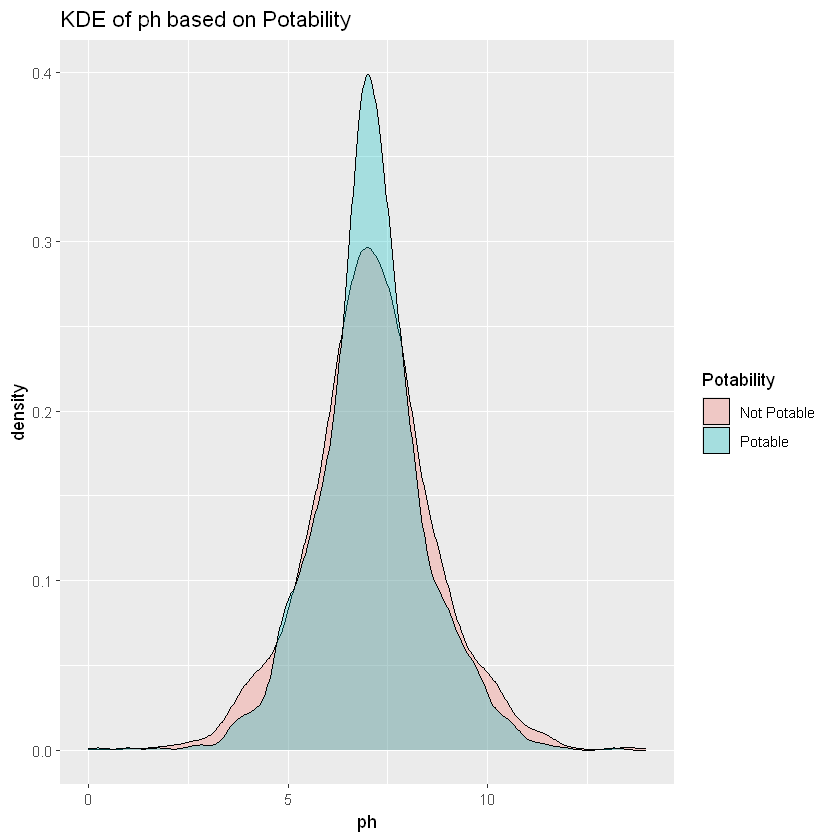

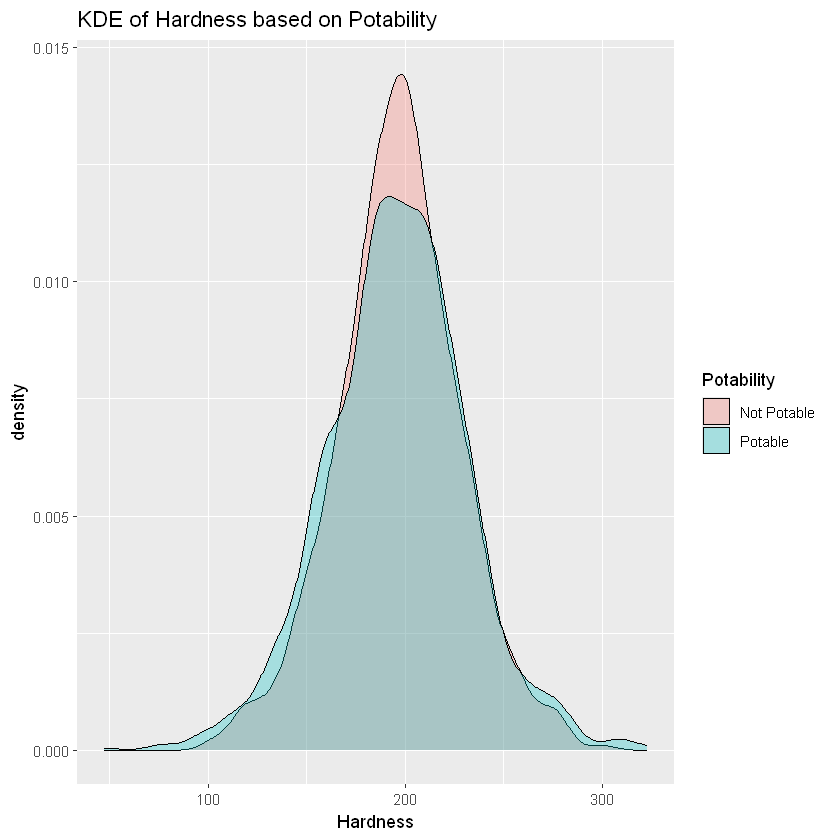

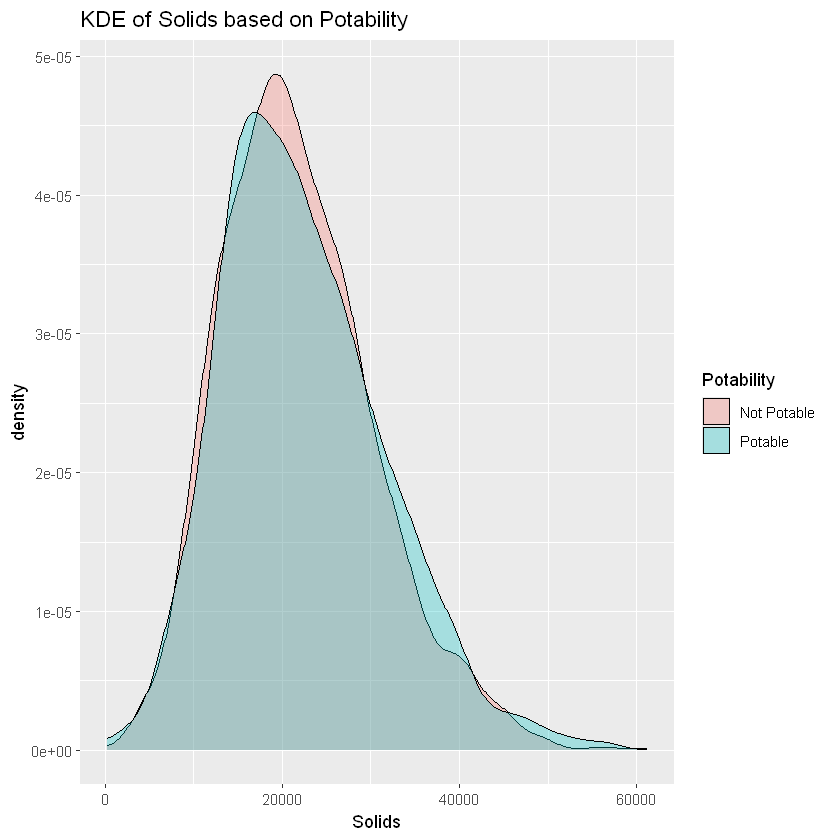

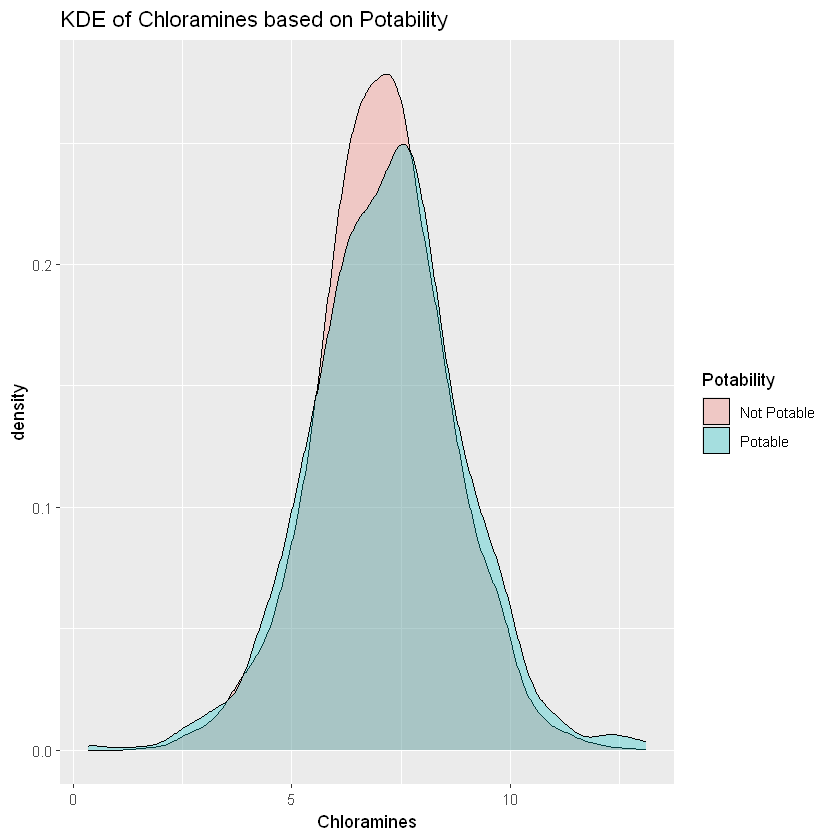

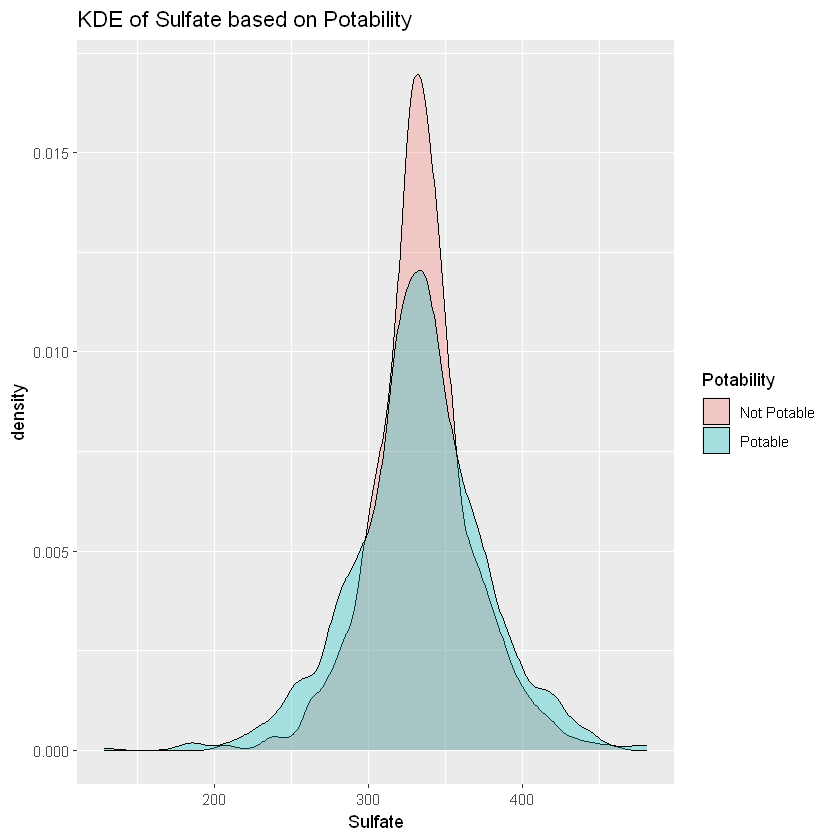

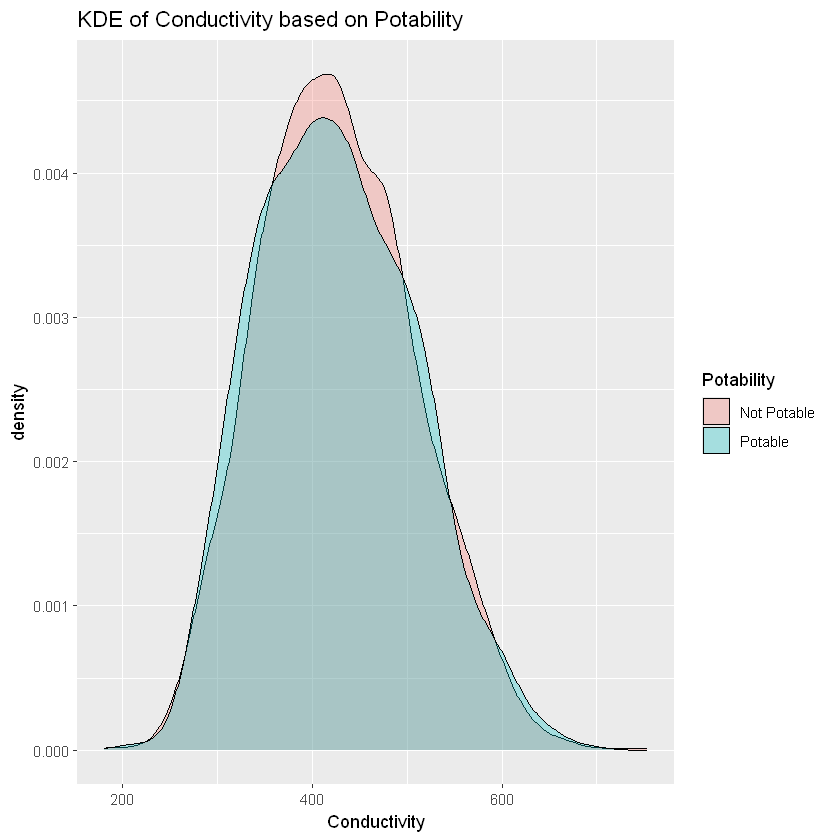

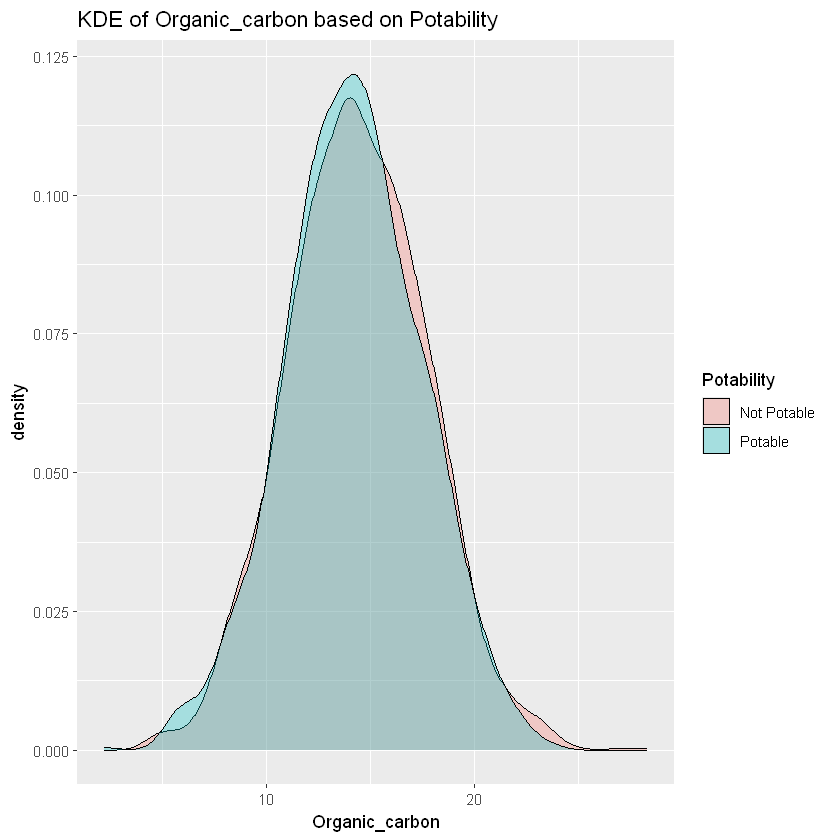

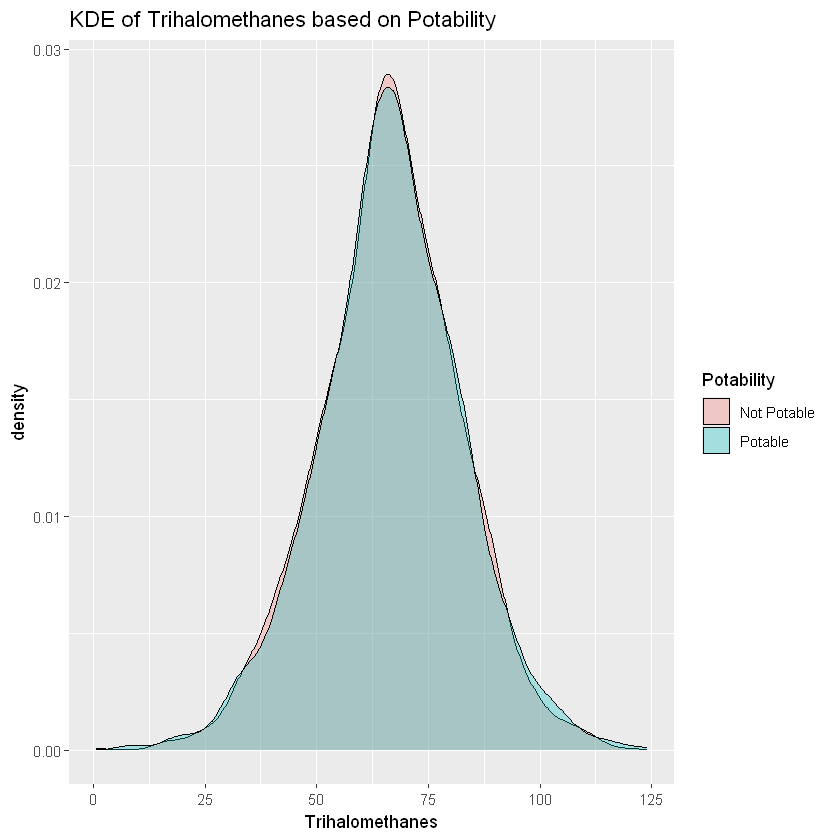

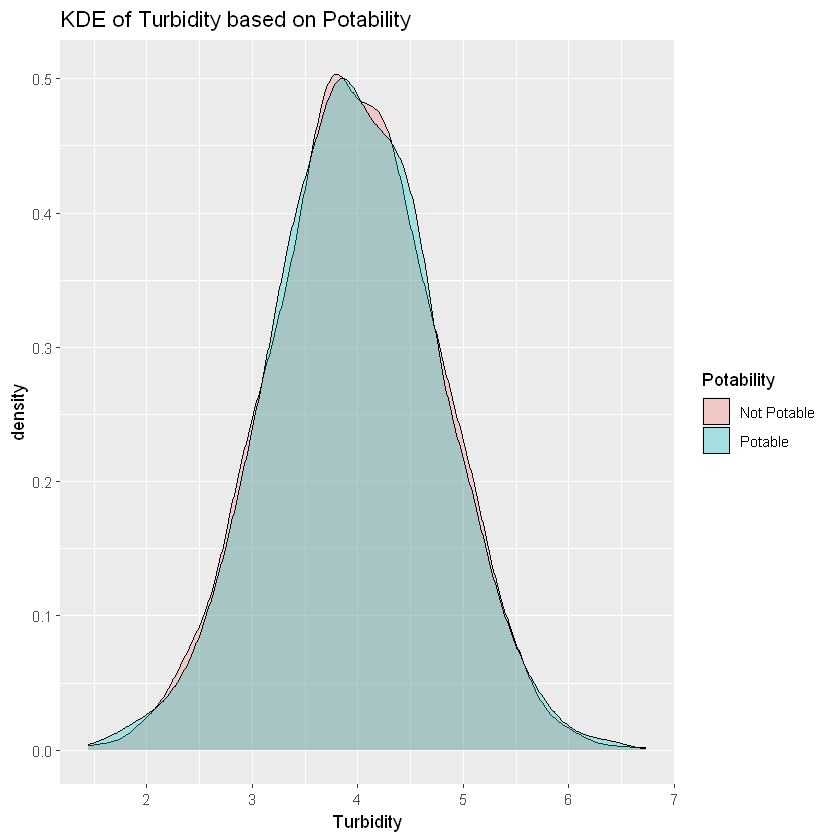

In [12]:
features <- c("ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity")
for (feature in features) {
  p <- ggplot(water.quality, aes_string(x=feature, fill="factor(Potability)")) + 
    geom_density(alpha = 0.3) +
    labs(title = paste("KDE of", feature, "based on Potability"), x = feature) +
    scale_fill_discrete(name = "Potability", labels = c("Not Potable", "Potable"))
  print(p)
}

In [13]:
skewness_values <- sapply(water.quality[, 1:9], skewness)
print(skewness_values)

kurtosis_values <- sapply(water.quality[, 1:9], kurtosis)
print(kurtosis_values)

             ph        Hardness          Solids     Chloramines         Sulfate 
    0.020766315    -0.039323689     0.621349818    -0.012092900    -0.045991521 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity 
    0.264369105     0.025520890    -0.087586712    -0.007813063 
             ph        Hardness          Solids     Chloramines         Sulfate 
       4.215267        3.613001        3.440320        3.587170        4.491691 
   Conductivity  Organic_carbon Trihalomethanes       Turbidity 
       2.721499        3.042511        3.394568        2.935464 


Hence from the above values we can see that the features have close to normal distributions.

# Building our Models

We will now focus on building our classification models to see which one would give us a better result. In this case we will have to take two splits of our dataset:

- 50/50
- 80/20

And compare our methods at each split. We will also make use of 5-fold cross validation whenever it is needed.

## Model: Logistic Regression

The first method we are choosing is Logistic Regression. Logistic regression is good for dealing with data that has a binary output and works based on a sigmoid function, as it considers the log odds. If we were to try to fit such data with a normal linear regression model, it would produce probability values less than 0 or greater than 1, which would not make sense given that our outputs are fixed binary values.

### 50/50 Split

In [14]:
Random.seed <- c("Mersenne-Twister", 530)
set.seed(530)
indices <- sample(1:nrow(water.quality), 0.5 * nrow(water.quality), replace = FALSE)
train_set <- water.quality[indices, ]
test_set <- water.quality[-indices, ]

logit.train <- glm(Potability ~ ., data=train_set, family = "binomial")
summary(logit.train)


Call:
glm(formula = Potability ~ ., family = "binomial", data = train_set)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)     -4.136e-01  8.853e-01  -0.467    0.640
ph               5.887e-03  3.507e-02   0.168    0.867
Hardness         3.711e-04  1.581e-03   0.235    0.814
Solids           7.326e-06  5.863e-06   1.250    0.211
Chloramines      7.128e-04  3.261e-02   0.022    0.983
Sulfate         -8.104e-04  1.449e-03  -0.559    0.576
Conductivity     5.351e-04  6.375e-04   0.839    0.401
Organic_carbon  -1.082e-02  1.573e-02  -0.688    0.492
Trihalomethanes -2.351e-03  3.150e-03  -0.746    0.455
Turbidity        7.501e-03  6.448e-02   0.116    0.907

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2188.3  on 1637  degrees of freedom
Residual deviance: 2184.4  on 1628  degrees of freedom
AIC: 2204.4

Number of Fisher Scoring iterations: 4


The above shows the estimated model for a 50/50 train test split, and how it fits the given data.

The null deviance, residual deviance, and the Akaike information criterion give us the indications as to how well our model fits the data.

**Null Deviance** tells us how well the target is predicted by the intercept term by itself.

**Residual Deviance** tells us how well the model fits the data with all independent variables.

The deviance residual is -2 * log likelihood, which we find below

In [15]:
logLik(logit.train)

'log Lik.' -1092.206 (df=10)

These measures can tell us if a model with the predictors do a better job of fitting the data than one with just an intercept (null model). For this we do the chi-square test. If we get a smaller p-value for this test, the model holds a high significance.

In [16]:
with(logit.train, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 0.9201406

Here we can see that the p-value is high, which means that our model isn't doing a good job in predicting the potability of the water sample.

Let's see the accuracy and other characteristics of our model. We first do so using our testing dataset.

In [17]:
head(test_set)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2,3.716080,129.4229,18630.06,6.635246,336.5433,592.8854,15.180013,56.32908,4.500656,0
4,8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
6,5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0
8,8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.363817,62.79831,4.401425,0
9,6.810541,118.9886,14285.58,7.804174,268.6469,389.3756,12.706049,53.92885,3.595017,0
10,11.180284,227.2315,25484.51,9.077200,404.0416,563.8855,17.927806,71.97660,4.370562,0


In [18]:
dim(test_set)

[1] 1638   10

In [19]:
predictions <- predict(logit.train, test_set, type="response")
predictions.binary <- ifelse(predictions > 0.5, 1, 0)
cftable <- table(predictions.binary, test_set$Potability)

accuracy <- sum(diag(cftable))/sum(cftable)
sensitivity<-cftable[1]/(cftable[1] + cftable[2])
specificity <- cftable[4]/(cftable[3] + cftable[4])
ppv <- cftable[1]/(cftable[1] + cftable[3])
npv <- cftable[4]/(cftable[2] + cftable[4])
print(cftable)
sprintf("accuracy = %s", accuracy)
sprintf("sensitivity = %s", sensitivity)
sprintf("specificity = %s", specificity)
sprintf("ppv = %s", ppv)
sprintf("npv = %s", npv)

                  
predictions.binary   0   1
                 0 996 641
                 1   0   1


[1] "accuracy = 0.608669108669109"

[1] "sensitivity = 1"

[1] "specificity = 0.00155763239875389"

[1] "ppv = 0.608430054978619"

[1] "npv = 1"

We now check our model's work on the training dataset.

In [20]:
predictions <- predict(logit.train, train_set, type="response")
predictions.binary <- ifelse(predictions > 0.5, 1, 0)
cftable <- table(predictions.binary, train_set$Potability)
accuracy <- sum(diag(cftable))/sum(cftable)
sensitivity<-cftable[1]/(cftable[1] + cftable[2])
specificity <- cftable[4]/(cftable[3] + cftable[4])
ppv <- cftable[1]/(cftable[1] + cftable[3])
npv <- cftable[4]/(cftable[2] + cftable[4])
print(cftable)
sprintf("accuracy = %s", accuracy)
sprintf("sensitivity = %s", sensitivity)
sprintf("specificity = %s", specificity)
sprintf("ppv = %s", ppv)
sprintf("npv = %s", npv)

                  
predictions.binary    0    1
                 0 1002  636


[1] "accuracy = 0.611721611721612"

[1] "sensitivity = 0.611721611721612"

[1] "specificity = NA"

[1] "ppv = NA"

[1] "npv = NA"

#### AUC/ROC Curves

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = train_set$Potability, predictor = predictions)

Data: predictions in 1002 controls (train_set$Potability 0) < 636 cases (train_set$Potability 1).
Area under the curve: 0.5207

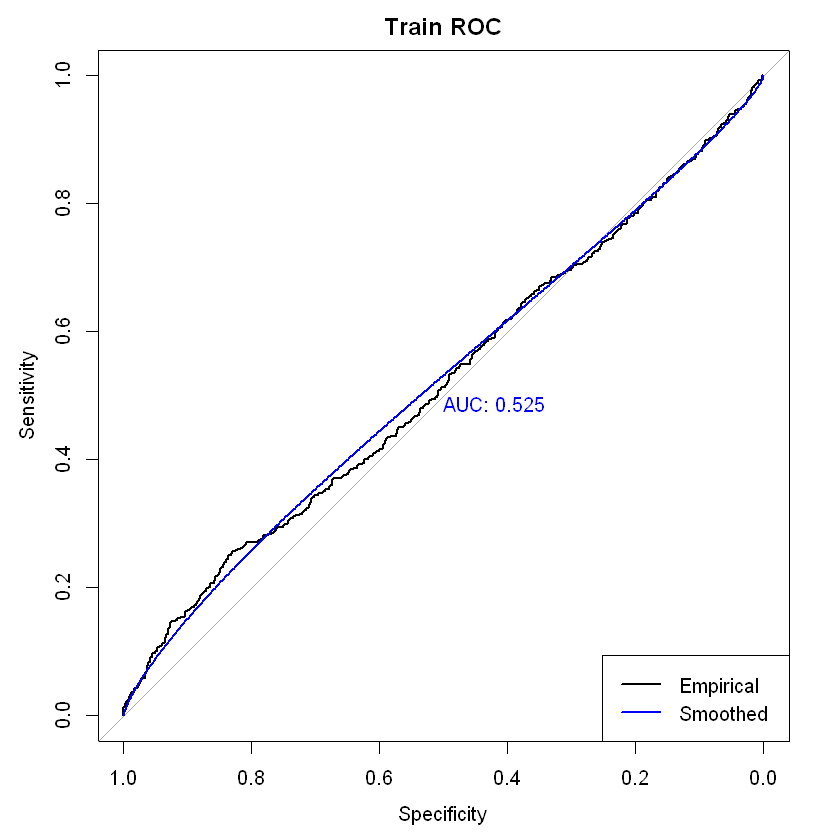

In [21]:
predictions <- predict(logit.train, train_set, type="response")
train.roc <- roc(train_set$Potability, predictions)
plot.roc(train.roc, main="Train ROC", col=par("fg"), plot=TRUE, print.auc=FALSE, legacy.axes=FALSE, asp =NA)
plot.roc(smooth(train.roc), col="blue", add=TRUE, plot=TRUE, print.auc=TRUE, legacy.axes=TRUE, asp=NA)
legend("bottomright", legend=c("Empirical", "Smoothed"),
       col=c(par("fg"), "blue"), lwd=2)
train.roc

Setting levels: control = 0, case = 1

Setting direction: controls > cases




Call:
roc.default(response = test_set$Potability, predictor = predictions)

Data: predictions in 996 controls (test_set$Potability 0) > 642 cases (test_set$Potability 1).
Area under the curve: 0.5018

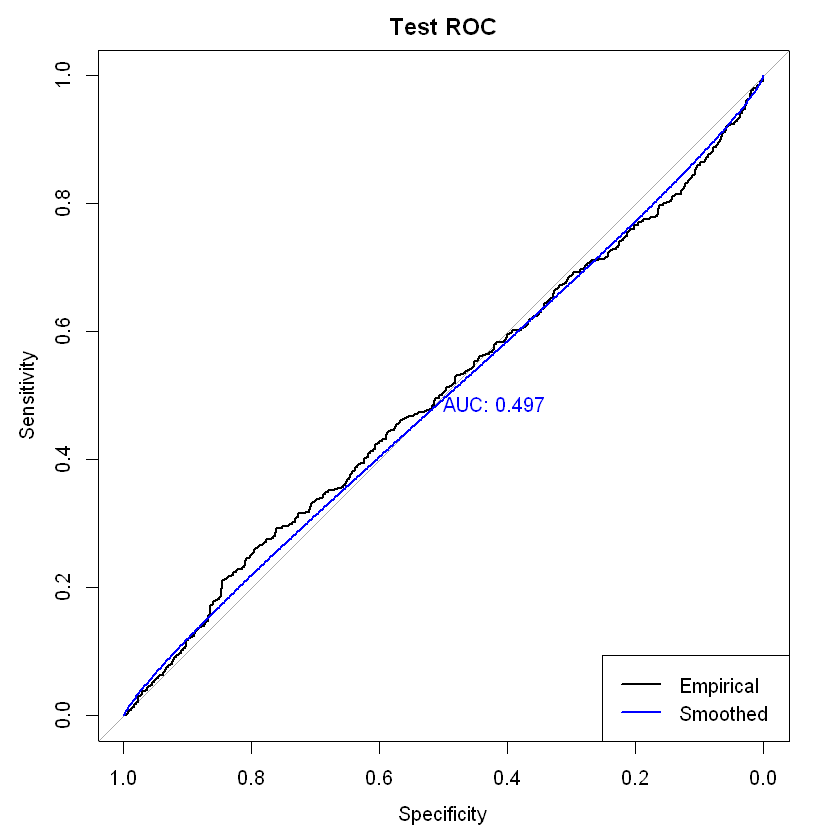

In [22]:
predictions <- predict(logit.train, test_set, type="response")
test.roc <- roc(test_set$Potability, predictions)
plot.roc(test.roc, main="Test ROC", col=par("fg"), plot=TRUE, print.auc=FALSE, legacy.axes=FALSE, asp =NA)
plot.roc(smooth(test.roc), col="blue", add=TRUE, plot=TRUE, print.auc=TRUE, legacy.axes=TRUE, asp=NA)
legend("bottomright", legend=c("Empirical", "Smoothed"),
       col=c(par("fg"), "blue"), lwd=2)
test.roc

### 80/20 split

In [23]:
set.seed(530)
indices <- sample(1:nrow(water.quality), 0.8 * nrow(water.quality), replace = FALSE)
train_set <- water.quality[indices, ]
test_set <- water.quality[-indices, ]

logit.train <- glm(Potability ~ ., data=train_set, family = "binomial")
summary(logit.train)


Call:
glm(formula = Potability ~ ., family = "binomial", data = train_set)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)      1.607e-01  6.905e-01   0.233   0.8160  
ph               2.105e-03  2.738e-02   0.077   0.9387  
Hardness        -4.318e-04  1.245e-03  -0.347   0.7288  
Solids           9.285e-06  4.719e-06   1.967   0.0491 *
Chloramines      6.066e-03  2.579e-02   0.235   0.8140  
Sulfate         -1.061e-03  1.124e-03  -0.945   0.3449  
Conductivity    -3.319e-06  4.972e-04  -0.007   0.9947  
Organic_carbon  -1.658e-02  1.217e-02  -1.362   0.1732  
Trihalomethanes -1.132e-03  2.555e-03  -0.443   0.6577  
Turbidity       -3.404e-02  5.151e-02  -0.661   0.5088  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3495.3  on 2619  degrees of freedom
Residual deviance: 3487.2  on 2610  degrees of freedom
AIC: 3507.2

Number of Fisher Scoring iteratio

In [24]:
predictions <- predict(logit.train, test_set, type="response")
predictions.binary <- ifelse(predictions > 0.5, 1, 0)
cftable <- table(predictions.binary, test_set$Potability)

accuracy <- sum(diag(cftable))/sum(cftable)
sensitivity<-cftable[1]/(cftable[1] + cftable[2])
specificity <- cftable[4]/(cftable[3] + cftable[4])
ppv <- cftable[1]/(cftable[1] + cftable[3])
npv <- cftable[4]/(cftable[2] + cftable[4])
print(cftable)
sprintf("accuracy = %s", accuracy)
sprintf("sensitivity = %s", sensitivity)
sprintf("specificity = %s", specificity)
sprintf("ppv = %s", ppv)
sprintf("npv = %s", npv)

                  
predictions.binary   0   1
                 0 390 265
                 1   0   1


[1] "accuracy = 0.596036585365854"

[1] "sensitivity = 1"

[1] "specificity = 0.0037593984962406"

[1] "ppv = 0.595419847328244"

[1] "npv = 1"

In [25]:
predictions <- predict(logit.train, train_set, type="response")
predictions.binary <- ifelse(predictions > 0.5, 1, 0)
cftable <- table(predictions.binary, train_set$Potability)
accuracy <- sum(diag(cftable))/sum(cftable)
sensitivity<-cftable[1]/(cftable[1] + cftable[2])
specificity <- cftable[4]/(cftable[3] + cftable[4])
ppv <- cftable[1]/(cftable[1] + cftable[3])
npv <- cftable[4]/(cftable[2] + cftable[4])
print(cftable)
sprintf("accuracy = %s", accuracy)
sprintf("sensitivity = %s", sensitivity)
sprintf("specificity = %s", specificity)
sprintf("ppv = %s", ppv)
sprintf("npv = %s", npv)

                  
predictions.binary    0    1
                 0 1608 1011
                 1    0    1


[1] "accuracy = 0.61412213740458"

[1] "sensitivity = 1"

[1] "specificity = 0.000988142292490119"

[1] "ppv = 0.61397479954181"

[1] "npv = 1"

#### AUC/ROC Curves

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = train_set$Potability, predictor = predictions)

Data: predictions in 1608 controls (train_set$Potability 0) < 1012 cases (train_set$Potability 1).
Area under the curve: 0.5241

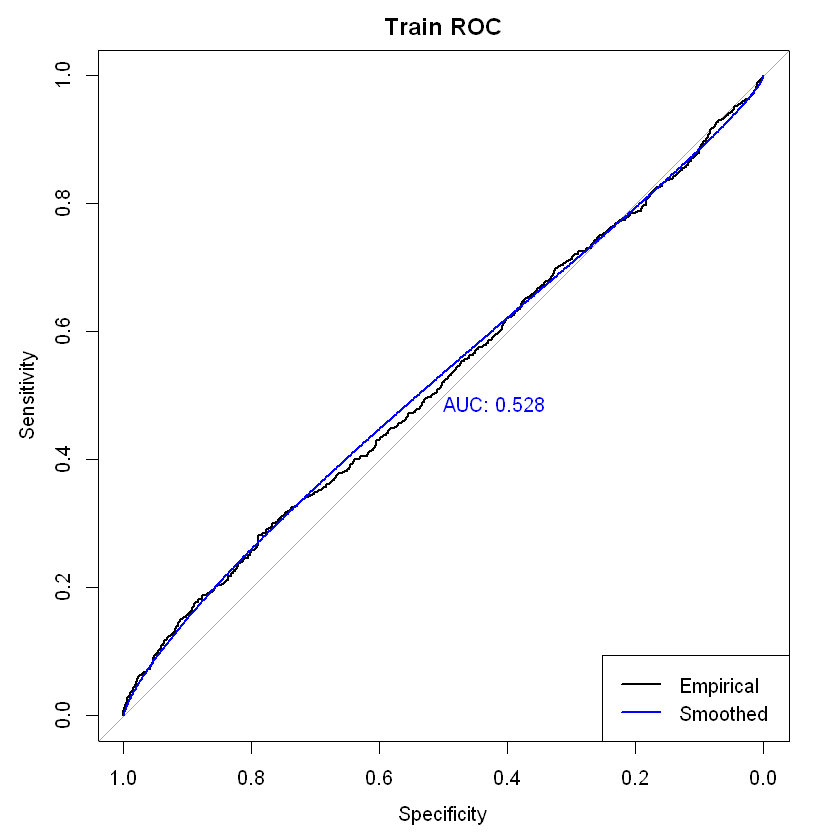

In [26]:
predictions <- predict(logit.train, train_set, type="response")
train.roc <- roc(train_set$Potability, predictions)
plot.roc(train.roc, main="Train ROC", col=par("fg"), plot=TRUE, print.auc=FALSE, legacy.axes=FALSE, asp =NA)
plot.roc(smooth(train.roc), col="blue", add=TRUE, plot=TRUE, print.auc=TRUE, legacy.axes=TRUE, asp=NA)
legend("bottomright", legend=c("Empirical", "Smoothed"),
       col=c(par("fg"), "blue"), lwd=2)
train.roc

Setting levels: control = 0, case = 1

Setting direction: controls > cases




Call:
roc.default(response = test_set$Potability, predictor = predictions)

Data: predictions in 390 controls (test_set$Potability 0) > 266 cases (test_set$Potability 1).
Area under the curve: 0.5109

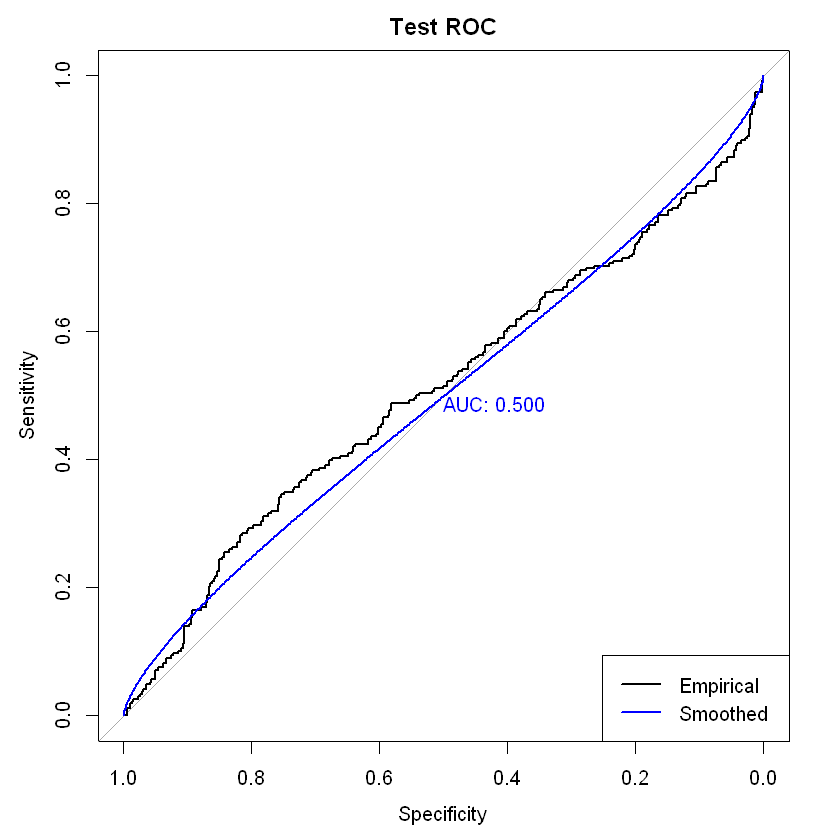

In [27]:
predictions <- predict(logit.train, test_set, type="response")
test.roc <- roc(test_set$Potability, predictions)
plot.roc(test.roc, main="Test ROC", col=par("fg"), plot=TRUE, print.auc=FALSE, legacy.axes=FALSE, asp =NA)
plot.roc(smooth(test.roc), col="blue", add=TRUE, plot=TRUE, print.auc=TRUE, legacy.axes=TRUE, asp=NA)
legend("bottomright", legend=c("Empirical", "Smoothed"),
       col=c(par("fg"), "blue"), lwd=2)
test.roc

The results are as shown below

## Results of the  Logistic Regression Model

### 50/50 split

**Model:**
$$
\begin{align*}
\text{Potability} = logit(p) =
&-4.136 \times 10^{-1}
+ (5.887 \times 10^{-3} \times \text{ph})
+ (3.711 \times 10^{-4} \times \text{hardness})
+ (7.326 \times 10^{-6} \times \text{Solids}) \\
&+ (7.128 \times 10^{-4} \times \text{Chloramines})
- (8.104 \times 10^{-4} \times \text{Sulfate})
+ (5.351 \times 10^{-4} \times \text{Conductivity}) \\
&- (1.082 \times 10^{-2} \times \text{Organic\_ carbon})
- (2.351 \times 10^{-3} \times \text{Trihalomethanes})
+ (7.501 \times 10^{-3} \times \text{Turbidity})
\end{align*}
$$

**Model Performance:**

| Dataset | Accuracy | Sensitivity | Specificity | PPV | NPV |
| ------- | -------- | ----------- | ----------- | --- | --- |
| Test | 0.608669108669109 | 1 | 0.00155763239875389 | 0.608430054978619 | 1 |
| Train | 0.611721611721612 | 0.611721611721612 | NA | NA | NA |

## Model: Random Forest

The second model we will be looking at is the random forest classifier.

The Random forest classifier is an ensemble learning method. Decision trees by themselves can have a lot of bias and overfitting. This is counteracted by using a Random Forest model, which can help us classify a large number of features and also help us identify the important attributes in our dataset.

The basic working of this algorithm takes a random sample of our dataset and builds a series of decision trees on the subsets, hence giving us a whole bunch of decision trees together. The more decision trees we use, the better our random forest will be at predicting, hence increasing the prediction accuracy.

Advantages:

- Reduces Overfitting
- Reduces the bias

The parameters we haveat hand for random forests are
- Node size
- Number of trees
- Number of features

A large number of trees would be ideal, but this would lead to a longer training time and the model even takes up more memory.

The model working is as follows:

- Draw **ntree** bootstrap samples
- For each sample, grow an unpruned tree by choosing the best split based on a random sample of **mtry** predictors at each node.
- Predict new data using majority votes for classification (and average for regression, which we are not using in this case) based on the ntree trees.

#### 50/50 Split

In [28]:
set.seed(530)
indices <- sample(1:nrow(water.quality), 0.5 * nrow(water.quality), replace = FALSE)
train_set <- water.quality[indices, ]
test_set <- water.quality[-indices, ]

In [29]:
set.seed(530)
rf.model <- randomForest(factor(Potability) ~ ., data = train_set, ntree = 500, mtry = 3, importance = TRUE)
print(rf.model)


Call:
 randomForest(formula = factor(Potability) ~ ., data = train_set,      ntree = 500, mtry = 3, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 28.69%
Confusion matrix:
    0   1 class.error
0 891 111   0.1107784
1 359 277   0.5644654


Seeing our model above, our out of bag (OOB) error is 28.69%, which tells us that the train dataset model accuracy is 71.31%.

In [30]:
predictions <- predict(rf.model, train_set)
confusionMatrix(predictions, as.factor(train_set$Potability))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1002    0
         1    0  636
                                     
               Accuracy : 1          
                 95% CI : (0.9978, 1)
    No Information Rate : 0.6117     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6117     
         Detection Rate : 0.6117     
   Detection Prevalence : 0.6117     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

In [31]:
predictions <- predict(rf.model, test_set)
confusionMatrix(predictions, as.factor(test_set$Potability))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 865 344
         1 131 298
                                          
               Accuracy : 0.71            
                 95% CI : (0.6874, 0.7319)
    No Information Rate : 0.6081          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3535          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8685          
            Specificity : 0.4642          
         Pos Pred Value : 0.7155          
         Neg Pred Value : 0.6946          
             Prevalence : 0.6081          
         Detection Rate : 0.5281          
   Detection Prevalence : 0.7381          
      Balanced Accuracy : 0.6663          
                                          
       'Positive' Class : 0               
                              

#### AUC/ROC Curves

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = train_set$Potability, predictor = predictions)

Data: predictions in 1002 controls (train_set$Potability 0) < 636 cases (train_set$Potability 1).
Area under the curve: 1

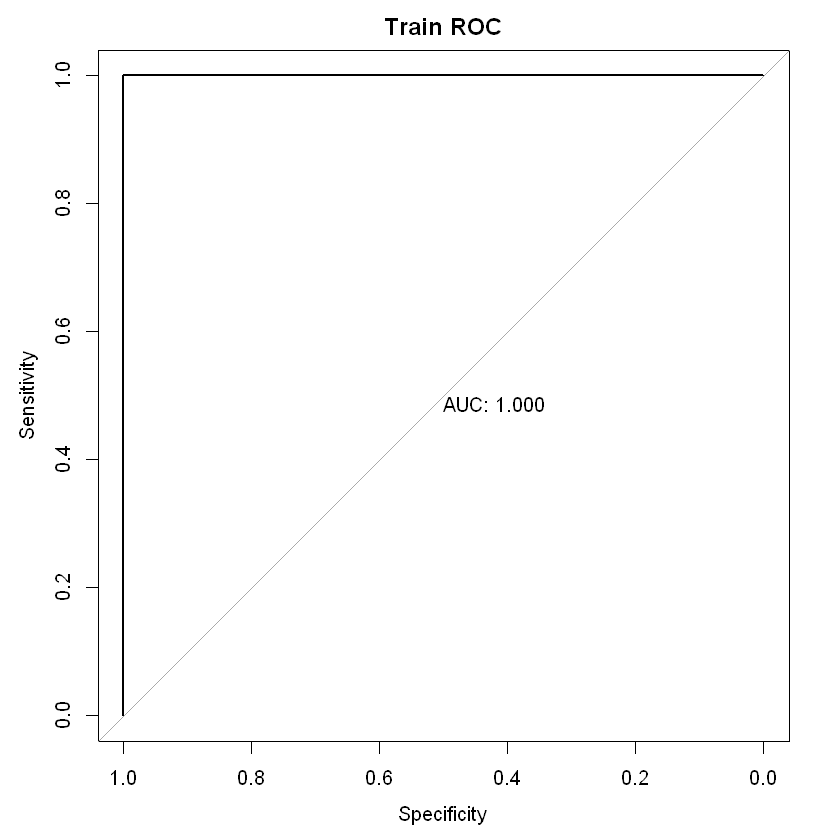

In [32]:
predictions <- as.numeric(predict(rf.model, train_set))
train.roc <- roc(train_set$Potability, predictions)
plot.roc(train.roc, main="Train ROC", col=par("fg"), plot=TRUE, print.auc=TRUE, legacy.axes=FALSE, asp =NA)
train.roc

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test_set$Potability, predictor = predictions)

Data: predictions in 996 controls (test_set$Potability 0) < 642 cases (test_set$Potability 1).
Area under the curve: 0.6673

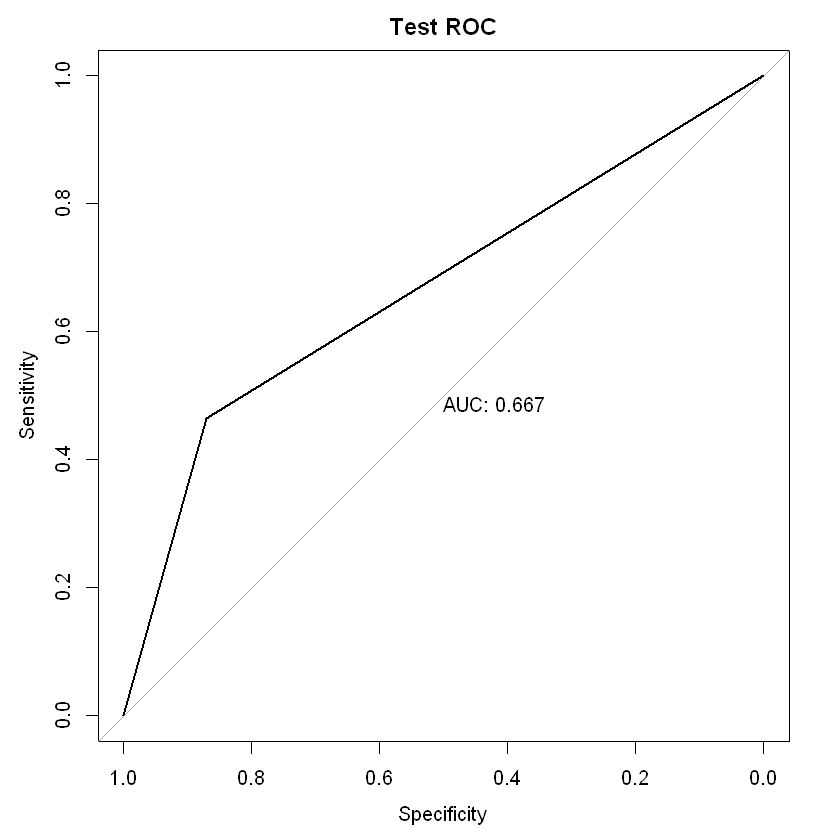

In [33]:
predictions <- as.numeric(predict(rf.model, test_set))
test.roc <- roc(test_set$Potability, predictions)
plot.roc(test.roc, main="Test ROC", col=par("fg"), plot=TRUE, print.auc=TRUE, legacy.axes=FALSE, asp =NA)
test.roc

We get the error rates of our random forest model below

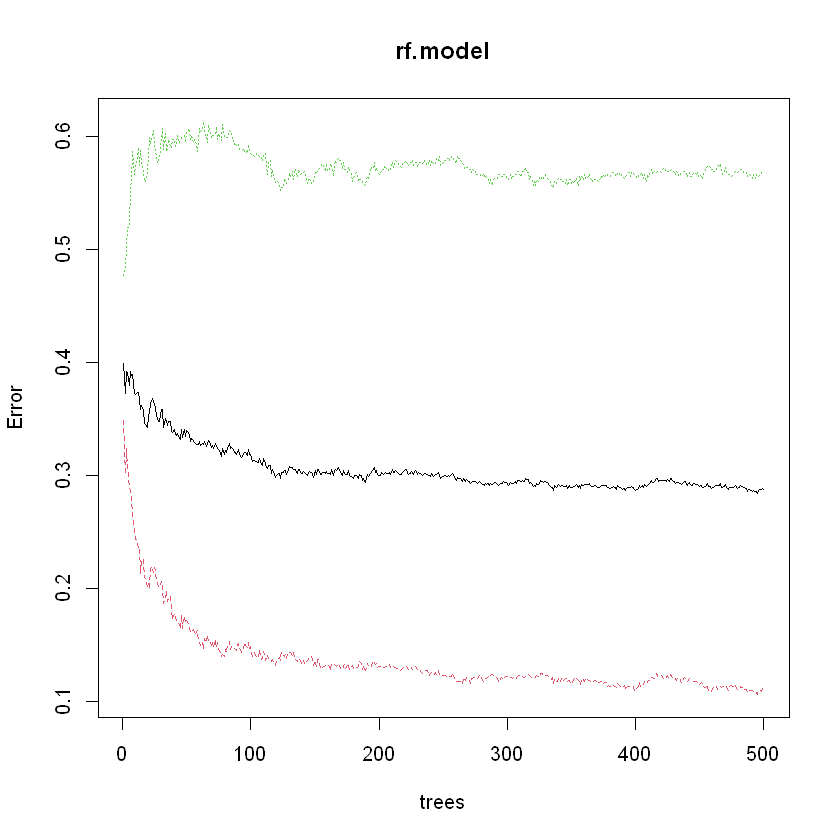

In [34]:
plot(rf.model)

Now, we can tune this model by increasing the ntree value, which will increase the accuracy to a certain point, but this is highly limited by compute time.

In this case, starting with the default value of mtry (number of random predictors at each node), we are trying to find the optimal value based on the out of box error.

In the code below, tuneRF takes

- The X values
- The Y values
- stepFactor -> This tells us how much the mtry value is changed at each iteration
- improve -> This tells the function how much the out of box error must improve for the search to continue
- ntreeTry -> The number of trees used in each tuning step

mtry = 3  OOB error = 29.85% 
Searching left ...
mtry = 2 	OOB error = 29.43% 
0.01431493 1e-20 
Searching right ...
mtry = 4 	OOB error = 29.24% 
0.006224066 1e-20 
mtry = 6 	OOB error = 28.69% 
0.01878914 1e-20 
mtry = 9 	OOB error = 29.49% 
-0.02765957 1e-20 


,mtry,OOBError
2.OOB,2,0.2942613
3.OOB,3,0.2985348
4.OOB,4,0.2924298
6.OOB,6,0.2869353
9.OOB,9,0.2948718


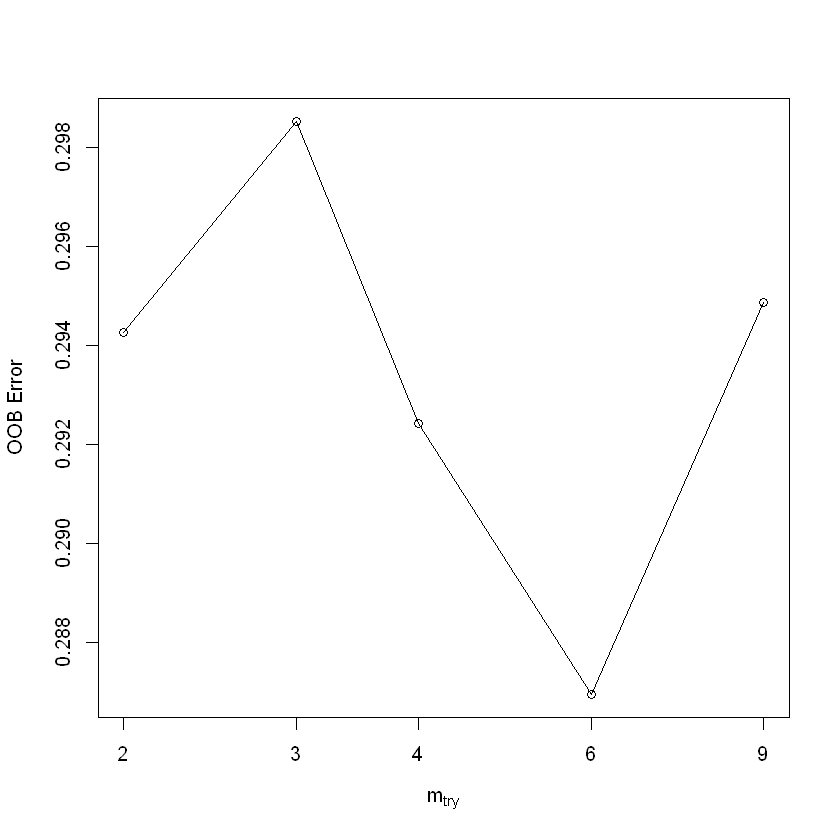

In [35]:
set.seed(530)
tuneRF(train_set[, -10], as.factor(train_set[, 10]), stepFactor=1.5, improve=1e-20, ntreeTry=500, plot=TRUE, trace=TRUE)

From the obtained graph, we can see that we have the most optimal error value of 28.69% at an mtry value of 6, however our model already performs at the given level of accuracy.

We now look at the number of nodes for the trees in our random forest.

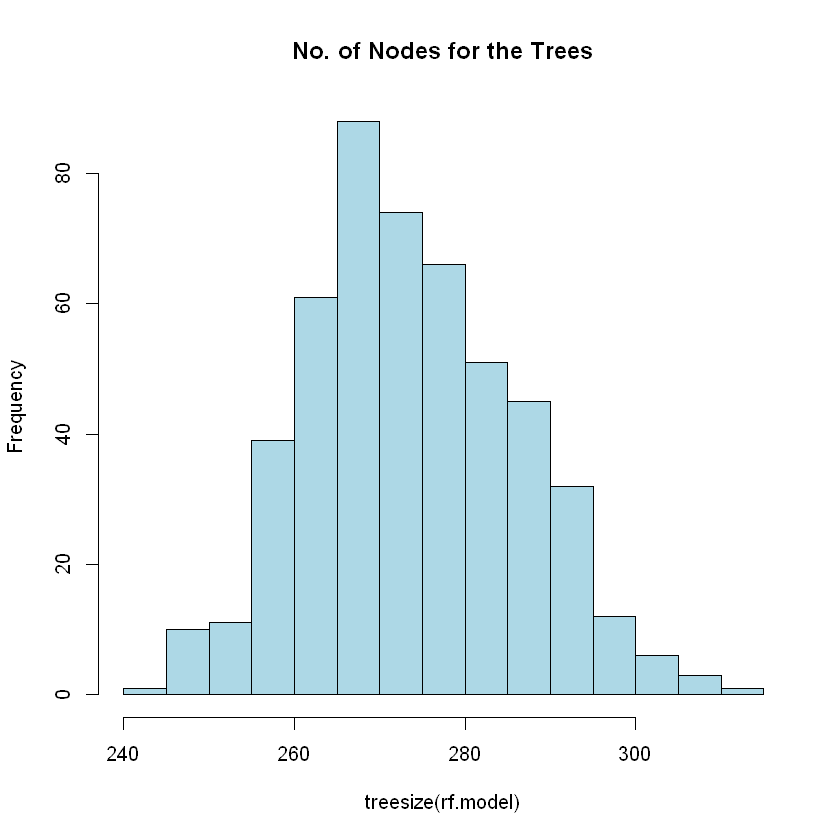

In [36]:
hist(treesize(rf.model), main = "No. of Nodes for the Trees", col = "lightblue")

### Variable Importance
We will also look at the importance each variable in our dataset holds for the given tree model

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
ph,38.5198109,23.8204537,42.8898418,113.11343
Hardness,24.6700038,4.9919206,23.0584410,93.33548
Solids,10.6588412,16.8666563,19.5400862,86.91883
Chloramines,12.0253587,7.1998431,14.2777404,85.28892
Sulfate,33.0312376,33.1821501,45.3481202,113.84377
Conductivity,0.4102107,-2.7318626,-1.3464702,68.35019
Organic_carbon,2.5081462,-2.4391891,0.3657326,71.12518
Trihalomethanes,1.5711319,-0.9551103,0.7060151,72.95830
Turbidity,6.4223618,-1.3622942,4.2780606,72.76042


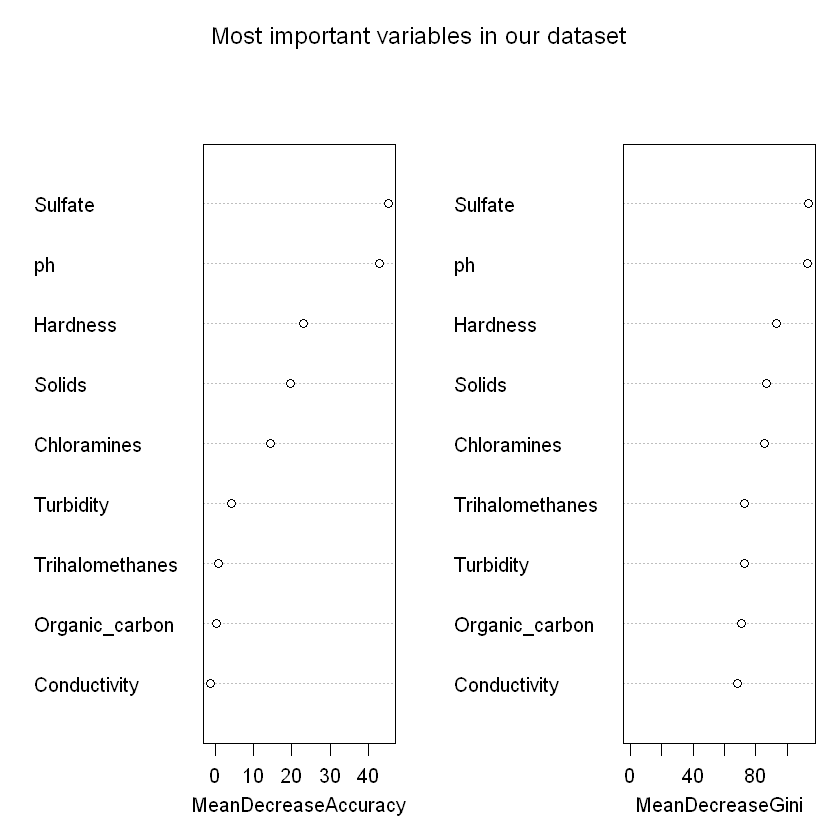

In [37]:
importance(rf.model)
varImpPlot(rf.model, sort=TRUE, n.var=9, main="Most important variables in our dataset")

The graph above shows how important each attribute in our dataset. Here we observe that Sulfate contrnt in each water sample holds the most importance, followed by the pH of the water sample.

### Partial dependence of the attributes in our Random Forest Model

Let's now have a look at how each of these variables are related to the Potability of our water samples.

#### The effects of Sulfates on drinking water potability 

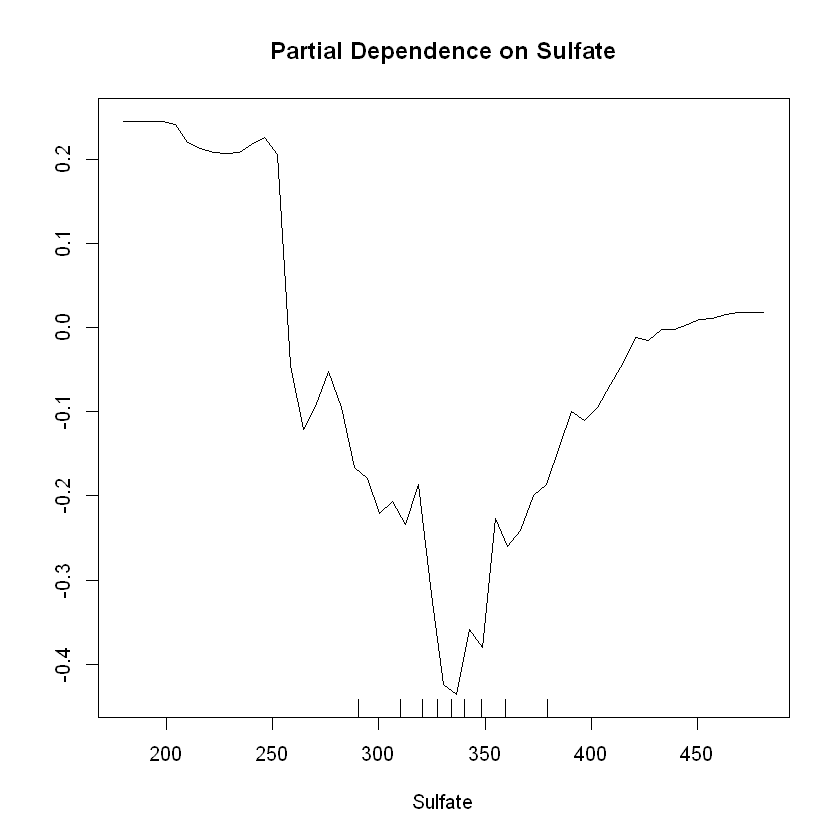

In [38]:
partialPlot(rf.model, train_set, Sulfate, 1)

Checking the Sulfate variable in our model with the training set, we see that Sulfates concentrations go low in the case of samples of potable water at approximately the 250 mg/L mark. This coincides with the safe level of sulfates allowed in drinking water according to the **United States Environmental Protection Agency** [Source](https://www.epa.gov/sites/default/files/2014-09/documents/support_cc1_sulfate_healtheffects.pdf)

We will now check the same with our testing set to confirm that this holds true.

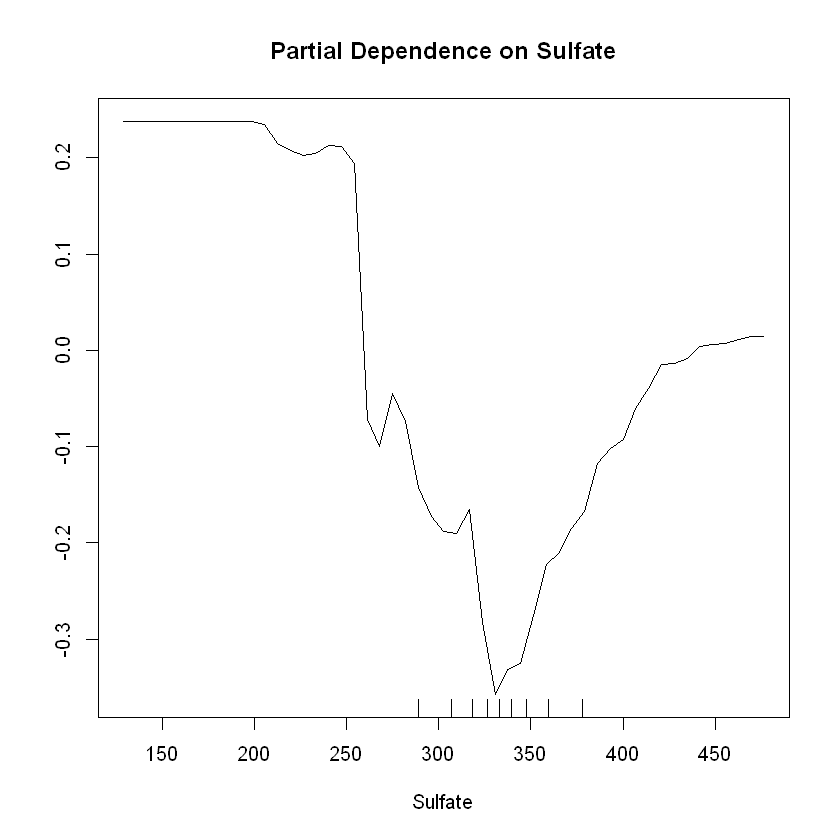

In [39]:
partialPlot(rf.model, test_set, Sulfate, 1)

This confirms our hypothesis. Now, we have a look at the importance of pH level on the water potability using the training and testing datasets.

#### The effects of pH on drinking water potability

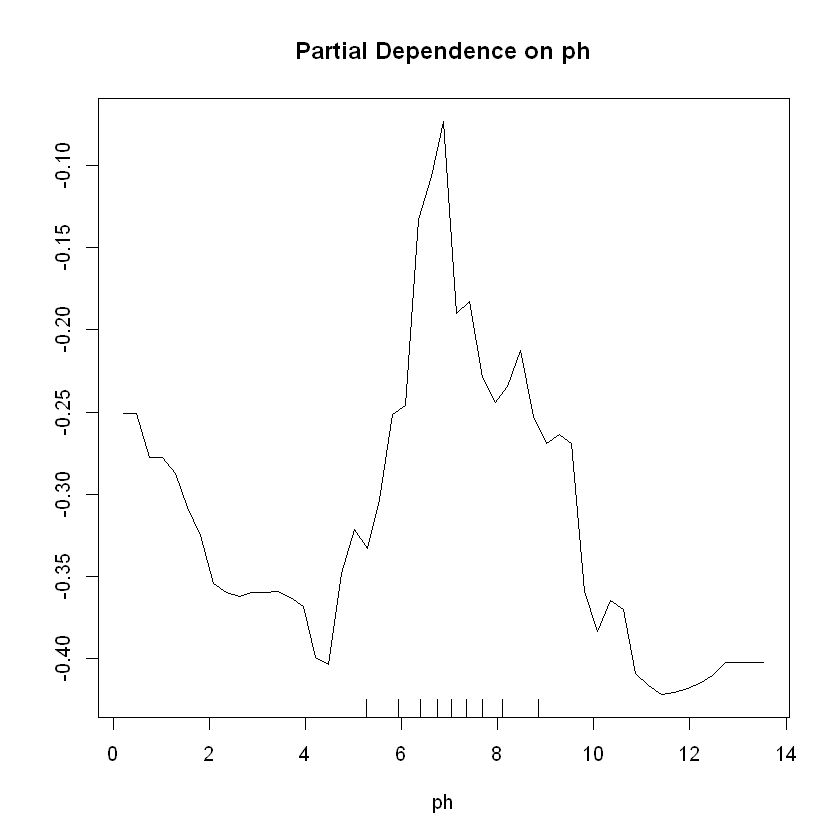

In [40]:
partialPlot(rf.model, train_set, ph, 1)

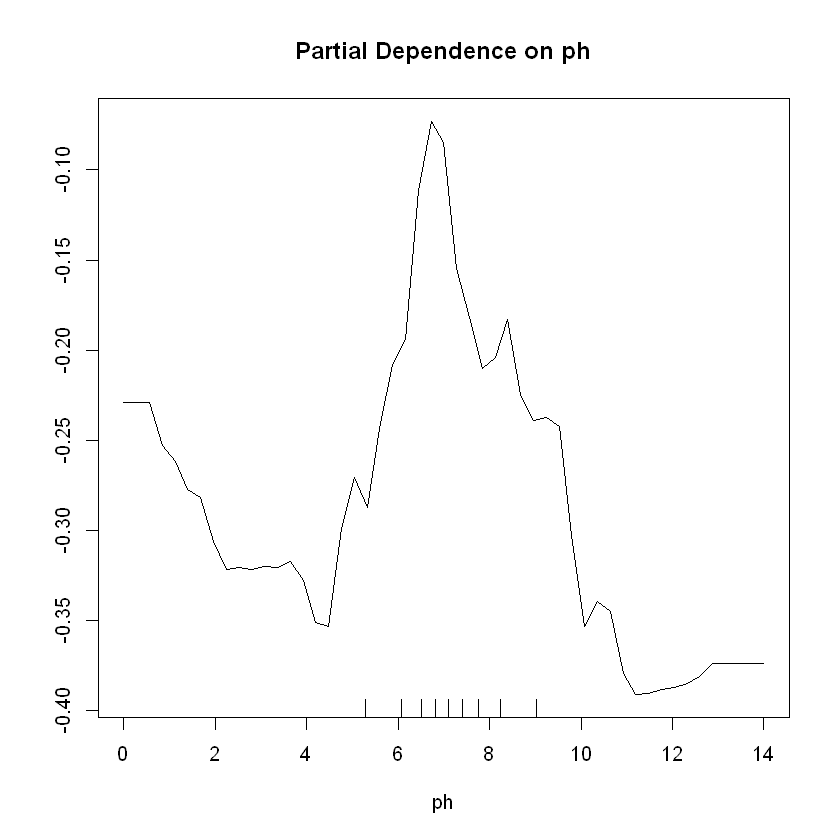

In [41]:
partialPlot(rf.model, test_set, ph, 1)

The above plots tell us that, coming to the potability of drinking water, pH levels of approximately 5 to 8 are acceptable according to our model. The **World Health Organisastion** states that though pH has nodirect impact on water consumers, it is an important water quality parameter to ensure satisfactory water clarification and disinfection. The optimum value provided to us by them is in the range of 6.5 to 9.5, which our model has a definite amount of overlap with.
[Source](https://cdn.who.int/media/docs/default-source/wash-documents/wash-chemicals/ph.pdf)

#### The effects of Hardness on drinking water potability

We finally look at our third most significant Variable in the context of potable water samples for both training and testing sets.

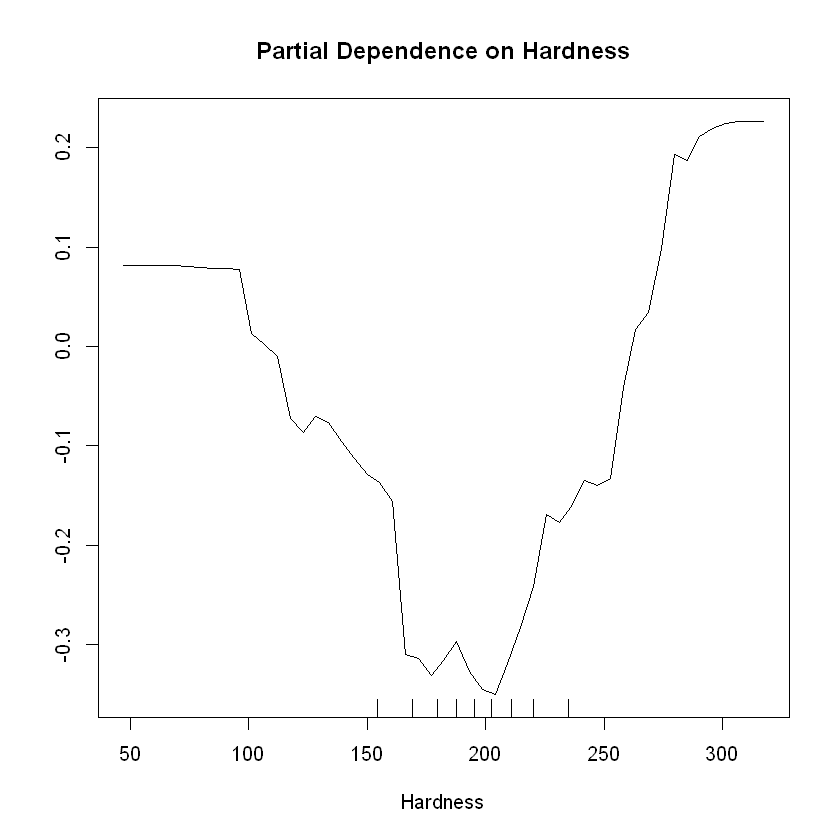

In [42]:
partialPlot(rf.model, train_set, Hardness, 1)

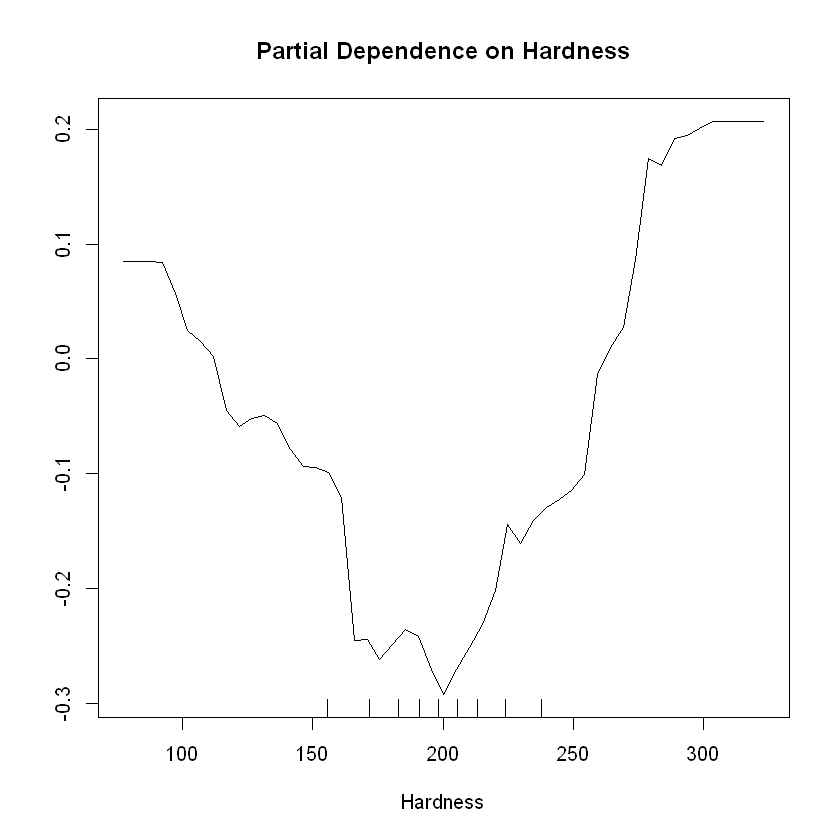

In [43]:
partialPlot(rf.model, test_set, Hardness, 1)

According to our model, a hardness level between 150 to 250 mg/L shows that a given sample of water is not-potable. We know that hardness is the capability of water to react with soap. Hardness is usually caused by a variety of dissolved metallic ions, predominantly calcium and Magnesium along with other cations.

According to the WHO, Concentrations of Calcium upto 100mg/L is usually seen in natural sources of water, with sources containing more than 200mg/L of Calcium being rare. **In drinking water, hardness attributed to Calcium Carbonate is in the range of 10-500mg**. [Source](https://cdn.who.int/media/docs/default-source/wash-documents/wash-chemicals/hardness2003.pdf).

If we notice our model's prediction we see that the given range of 150-250 mg/L coincides with the range of calcium concentration given by the WHO of 100-200mg/L, which to a certain extent confirms a lot of our samples are naturally sourced, but it also tells us that a lot of these natural water bodies are not potable, which tells us that the other variables at play could have a hand in this.

These variables are the top three most important variables of this model. Looking into the other variables as well would give us a better insight into how they individually have a hand in the potability of our samples, but for the time being we will be looking into these statistics.

#### 80/20 Split

In [44]:
set.seed(530)
indices <- sample(1:nrow(water.quality), 0.8 * nrow(water.quality), replace = FALSE)
train_set <- water.quality[indices, ]
test_set <- water.quality[-indices, ]

In [45]:
set.seed(530)
rf.model <- randomForest(factor(Potability) ~ ., data = train_set, ntree = 500, mtry = 3, importance = TRUE)
print(rf.model)


Call:
 randomForest(formula = factor(Potability) ~ ., data = train_set,      ntree = 500, mtry = 3, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 28.47%
Confusion matrix:
     0   1 class.error
0 1419 189   0.1175373
1  557 455   0.5503953


Seeing our model above, our out of bag (OOB) error is 28.47%, which is marginally better than the 50/50 split model.

In [46]:
predictions <- predict(rf.model, train_set)
confusionMatrix(predictions, as.factor(train_set$Potability))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1608    0
         1    0 1012
                                     
               Accuracy : 1          
                 95% CI : (0.9986, 1)
    No Information Rate : 0.6137     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6137     
         Detection Rate : 0.6137     
   Detection Prevalence : 0.6137     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

In [47]:
predictions <- predict(rf.model, test_set)
confusionMatrix(predictions, as.factor(test_set$Potability))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 350 138
         1  40 128
                                          
               Accuracy : 0.7287          
                 95% CI : (0.6929, 0.7624)
    No Information Rate : 0.5945          
    P-Value [Acc > NIR] : 4.989e-13       
                                          
                  Kappa : 0.4022          
                                          
 Mcnemar's Test P-Value : 3.583e-13       
                                          
            Sensitivity : 0.8974          
            Specificity : 0.4812          
         Pos Pred Value : 0.7172          
         Neg Pred Value : 0.7619          
             Prevalence : 0.5945          
         Detection Rate : 0.5335          
   Detection Prevalence : 0.7439          
      Balanced Accuracy : 0.6893          
                                          
       'Positive' Class : 0               
                              

Our model has an accuracy of 72.87% with the testing set!

#### AUC/ROC Curves

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = train_set$Potability, predictor = predictions)

Data: predictions in 1608 controls (train_set$Potability 0) < 1012 cases (train_set$Potability 1).
Area under the curve: 1

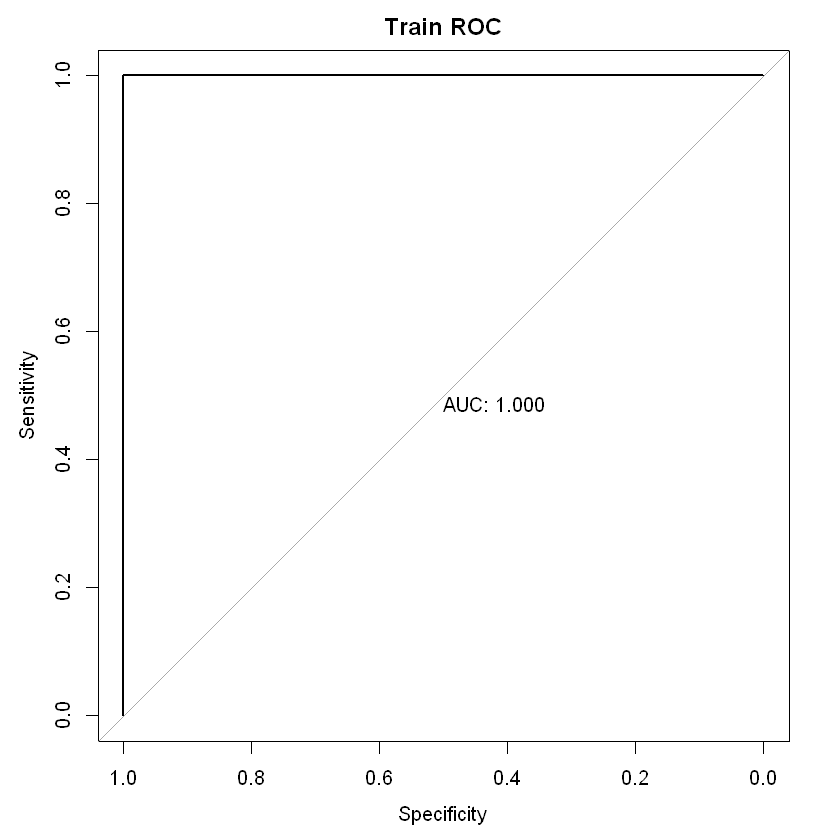

In [48]:
predictions <- as.numeric(predict(rf.model, train_set))
train.roc <- roc(train_set$Potability, predictions)
plot.roc(train.roc, main="Train ROC", col=par("fg"), plot=TRUE, print.auc=TRUE, legacy.axes=FALSE, asp =NA)
train.roc

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test_set$Potability, predictor = predictions)

Data: predictions in 390 controls (test_set$Potability 0) < 266 cases (test_set$Potability 1).
Area under the curve: 0.6874

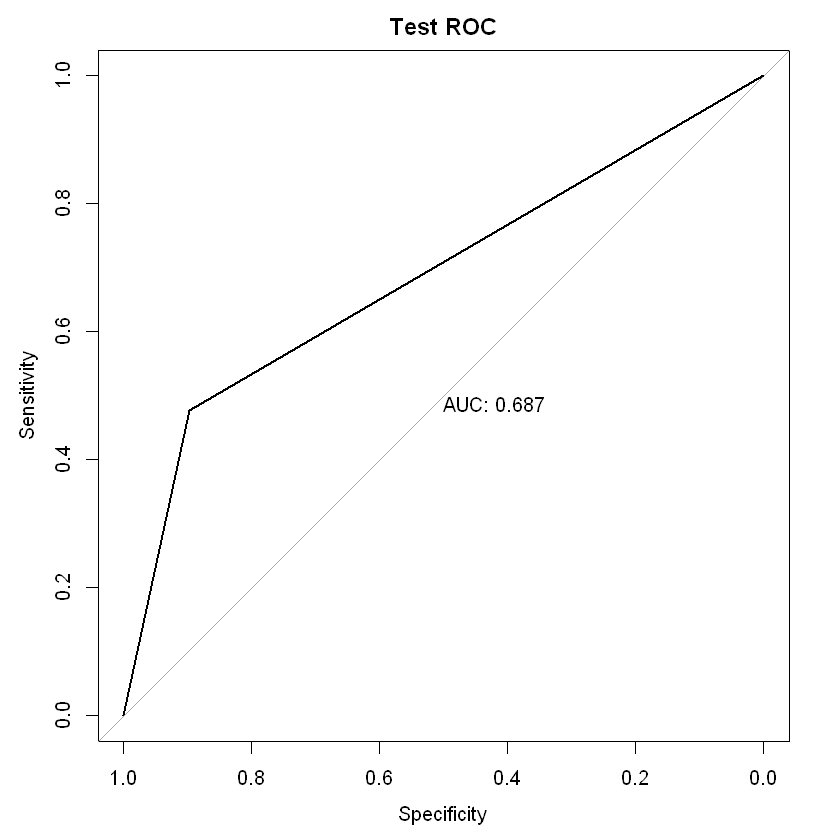

In [49]:
predictions <- as.numeric(predict(rf.model, test_set))
test.roc <- roc(test_set$Potability, predictions)
plot.roc(test.roc, main="Test ROC", col=par("fg"), plot=TRUE, print.auc=TRUE, legacy.axes=FALSE, asp =NA)
test.roc

Below we have the error rates (MSE) of the random forest model above

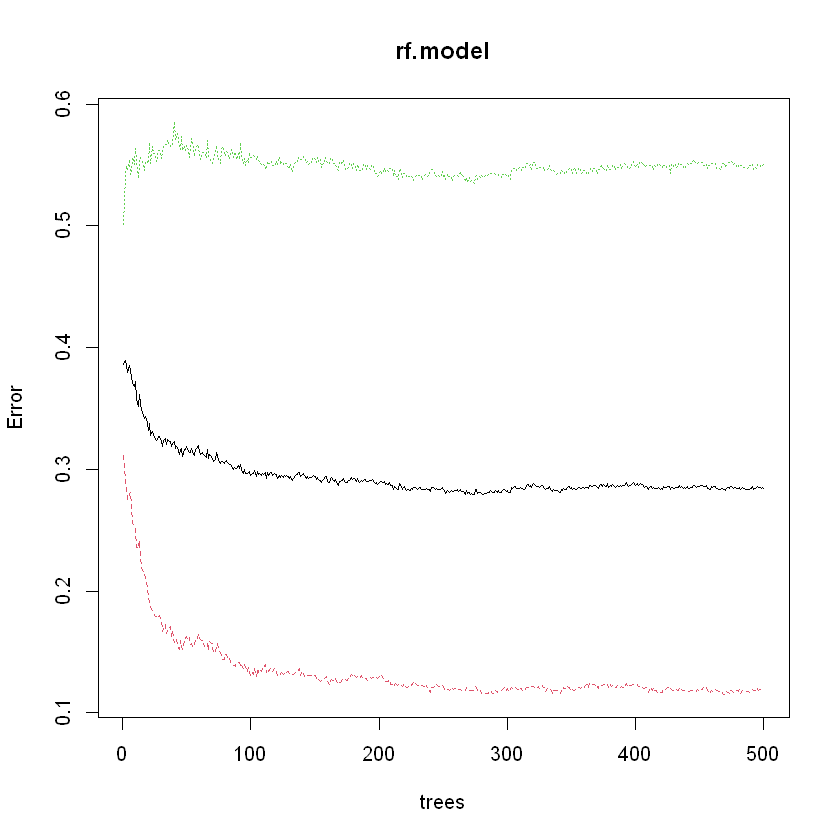

In [50]:
plot(rf.model)

mtry = 3  OOB error = 28.97% 
Searching left ...
mtry = 2 	OOB error = 29.69% 
-0.02503294 1e-20 
Searching right ...
mtry = 4 	OOB error = 28.05% 
0.03162055 1e-20 
mtry = 6 	OOB error = 29.35% 
-0.0462585 1e-20 


,mtry,OOBError
2.OOB,2,0.2969466
3.OOB,3,0.2896947
4.OOB,4,0.2805344
6.OOB,6,0.2935115


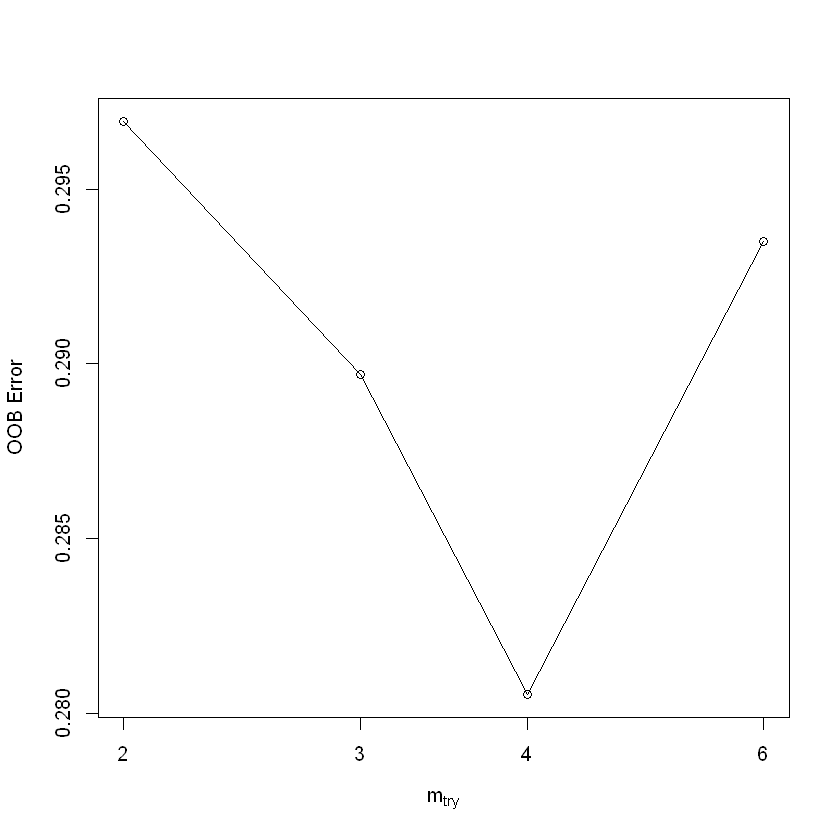

In [51]:
set.seed(530)
tuneRF(train_set[, -10], as.factor(train_set[, 10]), stepFactor=1.5, improve=1e-20, ntreeTry=500, plot=TRUE, trace=TRUE)

Using the graph above we can see that we get a minimum error value at an mtry value of approximately 4. Using a value in that ballpark to train our model we get the following results.

In [52]:
set.seed(530)
rf.model <- randomForest(factor(Potability) ~ ., data = train_set, ntree = 500, mtry = 5, importance = TRUE)
print(rf.model)


Call:
 randomForest(formula = factor(Potability) ~ ., data = train_set,      ntree = 500, mtry = 5, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 28.05%
Confusion matrix:
     0   1 class.error
0 1404 204   0.1268657
1  531 481   0.5247036


In [53]:
predictions <- predict(rf.model, train_set)
confusionMatrix(predictions, as.factor(train_set$Potability))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1608    0
         1    0 1012
                                     
               Accuracy : 1          
                 95% CI : (0.9986, 1)
    No Information Rate : 0.6137     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6137     
         Detection Rate : 0.6137     
   Detection Prevalence : 0.6137     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

In [54]:
predictions <- predict(rf.model, test_set)
confusionMatrix(predictions, as.factor(test_set$Potability))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 341 131
         1  49 135
                                          
               Accuracy : 0.7256          
                 95% CI : (0.6897, 0.7594)
    No Information Rate : 0.5945          
    P-Value [Acc > NIR] : 1.672e-12       
                                          
                  Kappa : 0.4016          
                                          
 Mcnemar's Test P-Value : 1.566e-09       
                                          
            Sensitivity : 0.8744          
            Specificity : 0.5075          
         Pos Pred Value : 0.7225          
         Neg Pred Value : 0.7337          
             Prevalence : 0.5945          
         Detection Rate : 0.5198          
   Detection Prevalence : 0.7195          
      Balanced Accuracy : 0.6909          
                                          
       'Positive' Class : 0               
                              

#### AUC/ROC Curve

In this case, we are checking the ROC curve for updated 80/20 model with the testing dataset  

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test_set$Potability, predictor = predictions)

Data: predictions in 390 controls (test_set$Potability 0) < 266 cases (test_set$Potability 1).
Area under the curve: 0.6922

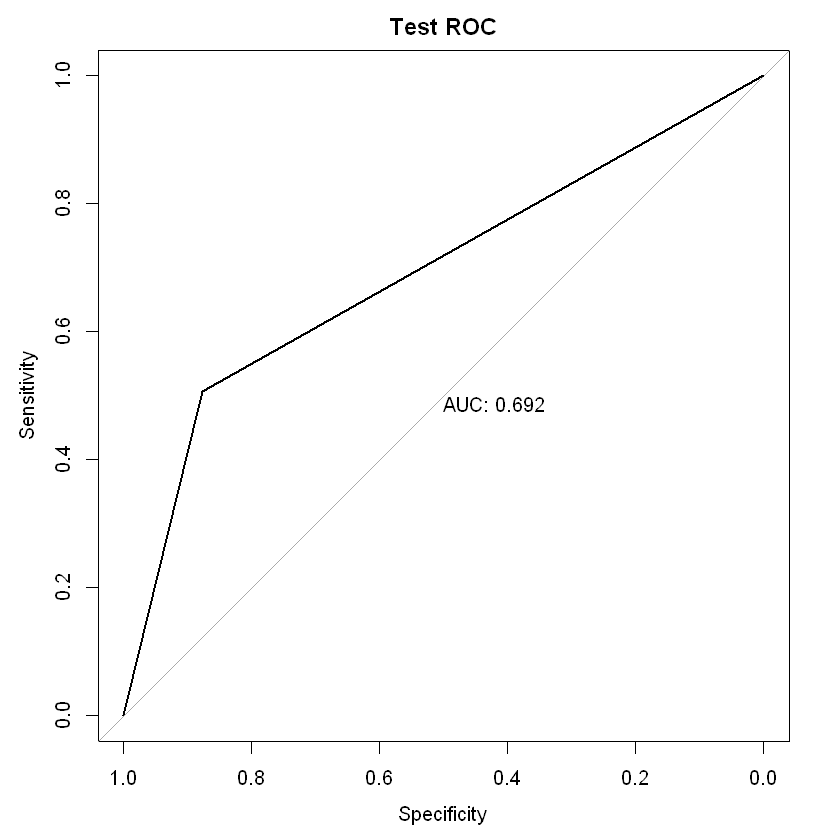

In [55]:
predictions <- as.numeric(predict(rf.model, test_set))
test.roc <- roc(test_set$Potability, predictions)
plot.roc(test.roc, main="Test ROC", col=par("fg"), plot=TRUE, print.auc=TRUE, legacy.axes=FALSE, asp =NA)
test.roc

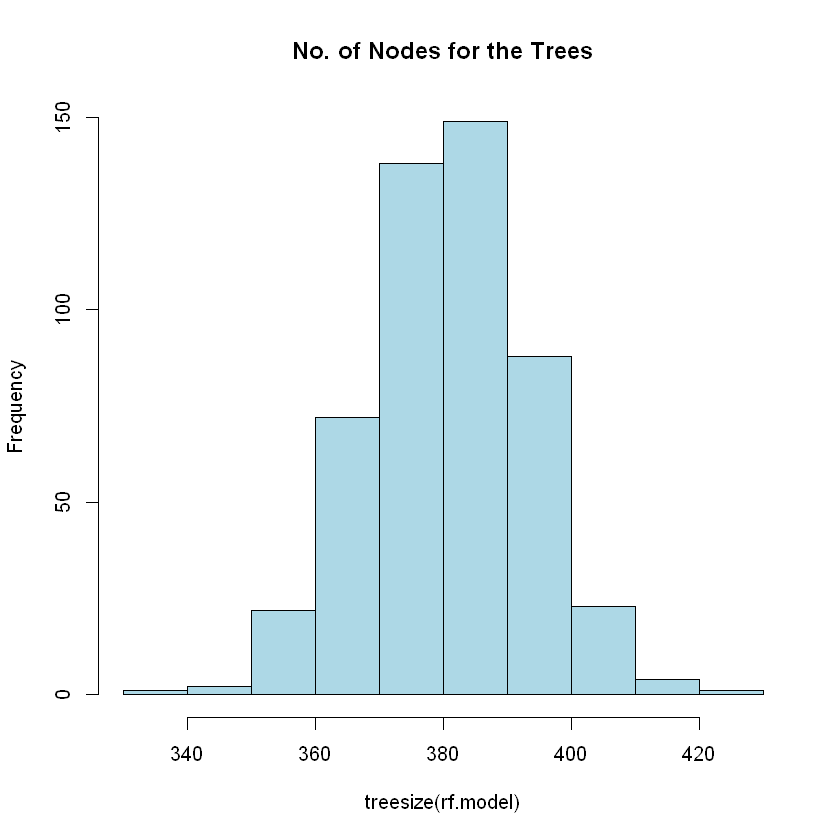

In [56]:
hist(treesize(rf.model), main = "No. of Nodes for the Trees", col = "lightblue")

### Confirmation of Variable Importance

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
ph,59.071585,36.43416448,65.118922,187.7402
Hardness,39.421144,4.51052083,34.643603,152.8770
Solids,8.376582,27.31978624,23.637454,141.8695
Chloramines,20.216547,14.88846084,24.568680,143.7348
Sulfate,50.922190,50.24900737,68.331330,193.2072
Conductivity,3.135922,0.63078744,2.932918,109.2007
Organic_carbon,4.310666,-2.23376543,1.900023,105.5639
Trihalomethanes,1.253763,1.84478335,2.172669,103.3332
Turbidity,4.398661,-0.05341115,3.325532,104.5934


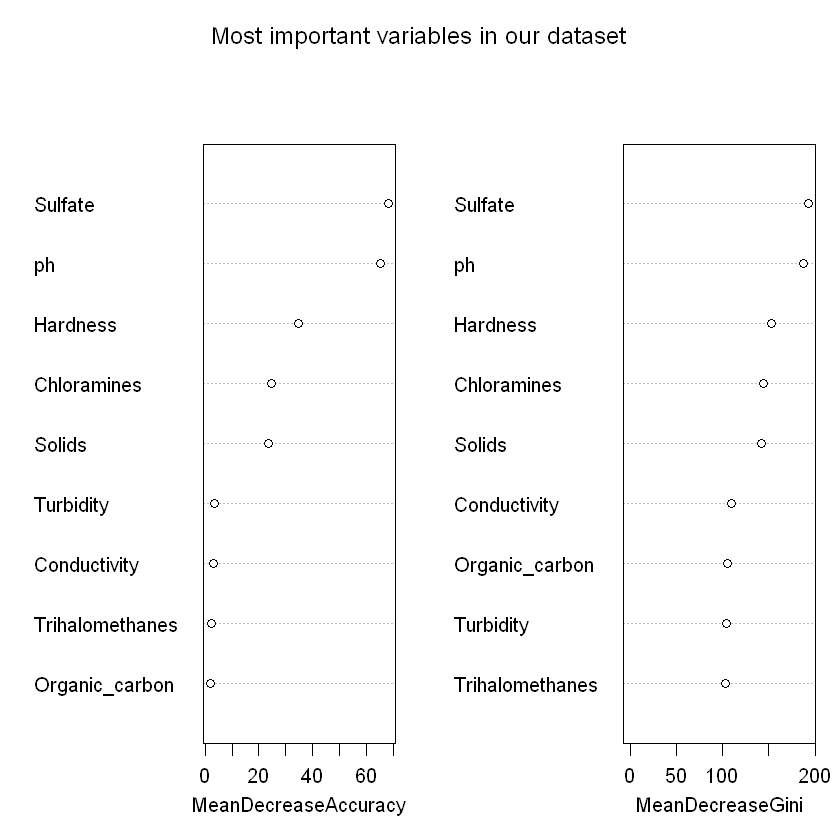

In [57]:
importance(rf.model)
varImpPlot(rf.model, sort=TRUE, n.var=9, main="Most important variables in our dataset")

The order of importance of our top three variables remain the same as the model trained with a 50/50 split, with some observed variations in the rest of the variables.

Let's focus on the partial dependence of Sulfate and pH levels again to confirm our hypotheses.

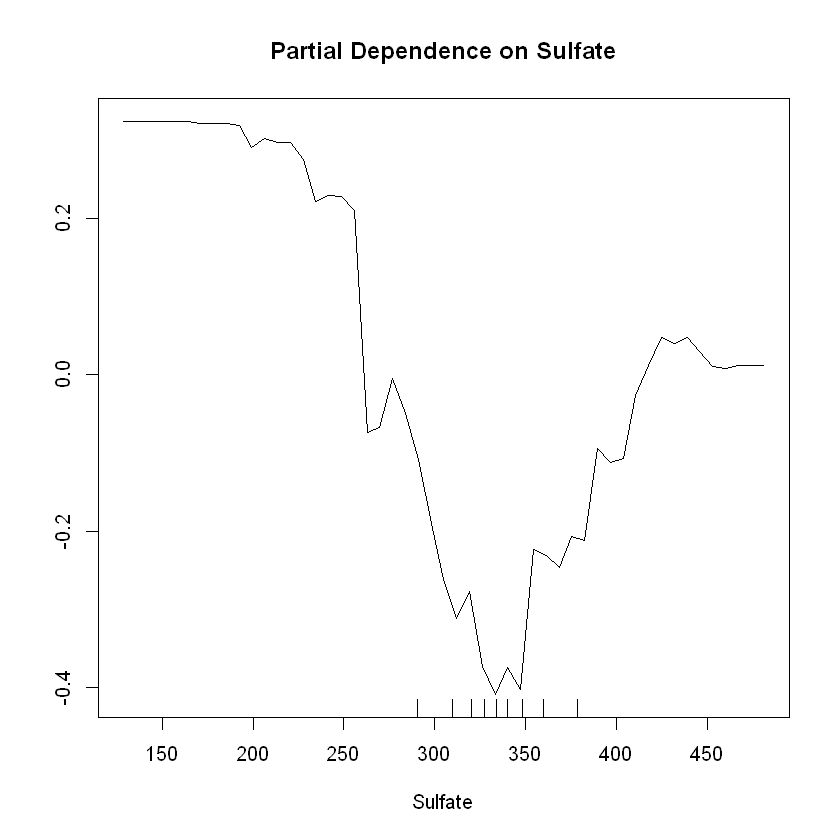

In [58]:
partialPlot(rf.model, train_set, Sulfate, 1)

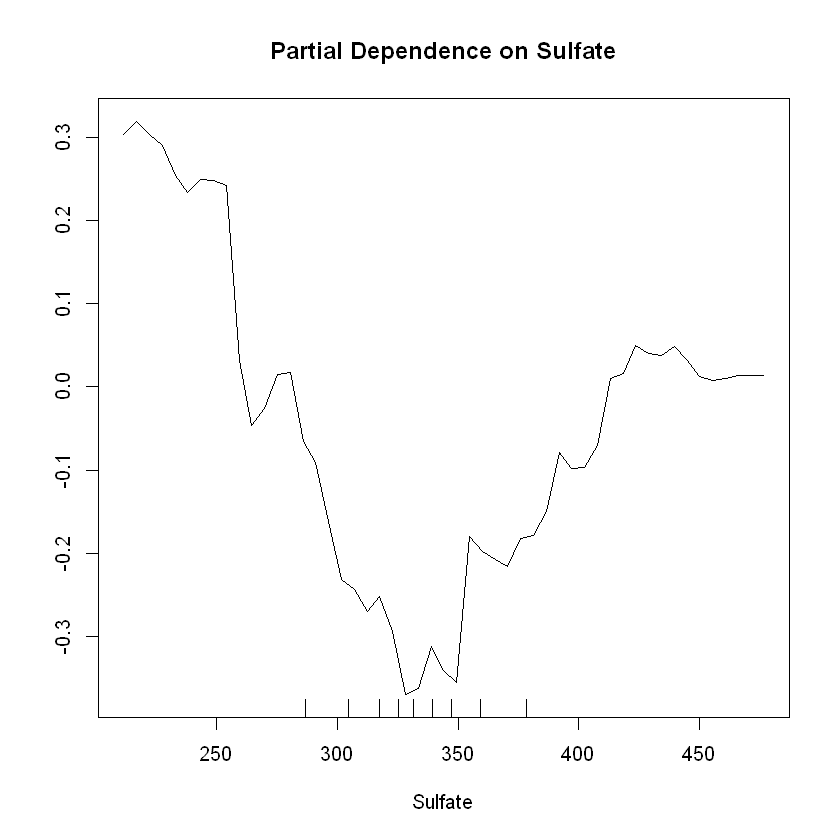

In [59]:
partialPlot(rf.model, test_set, Sulfate, 1)

The sulfate values more or less match the values given by our previous model.

Moving onto the pH value

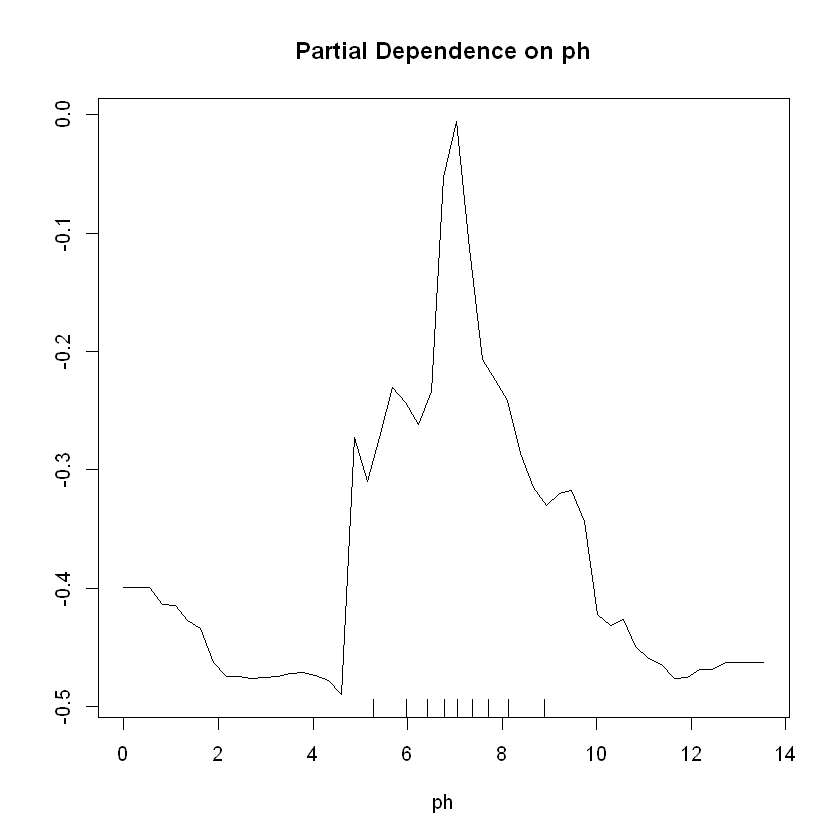

In [60]:
partialPlot(rf.model, train_set, ph, 1)

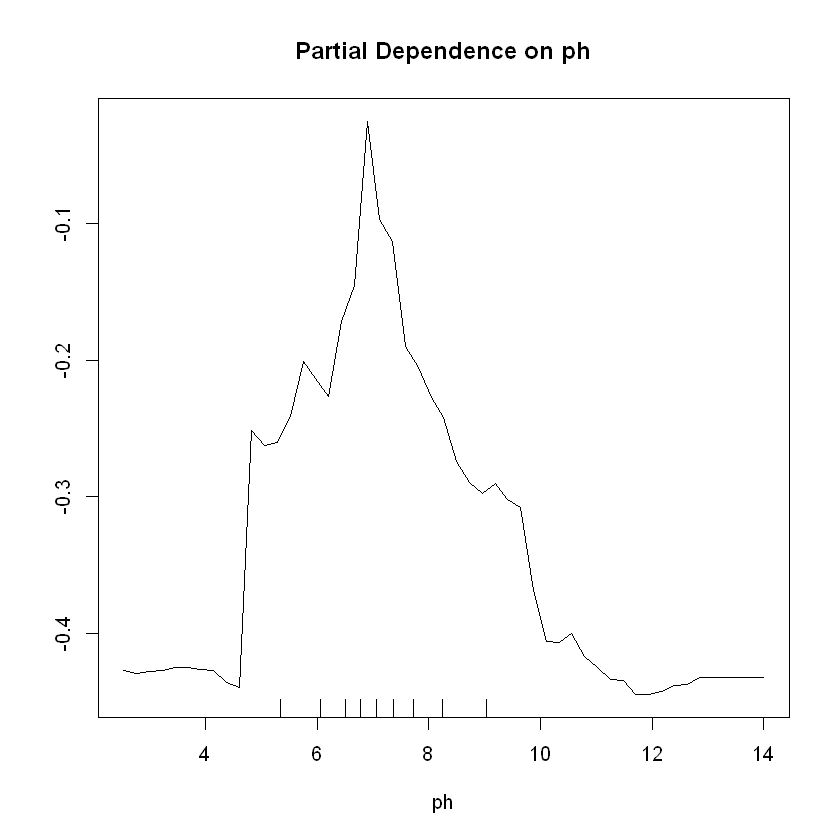

In [61]:
partialPlot(rf.model, test_set, ph, 1)

For this split, we see a sharp increase at the 4.5 to 8 mark of pH level with tells us that the given range has a high amount of coincidence with potable water samples. It does differ a bit from our previous model but still had a good amount of overlap with the information provided to us by the World Health Organisation. 

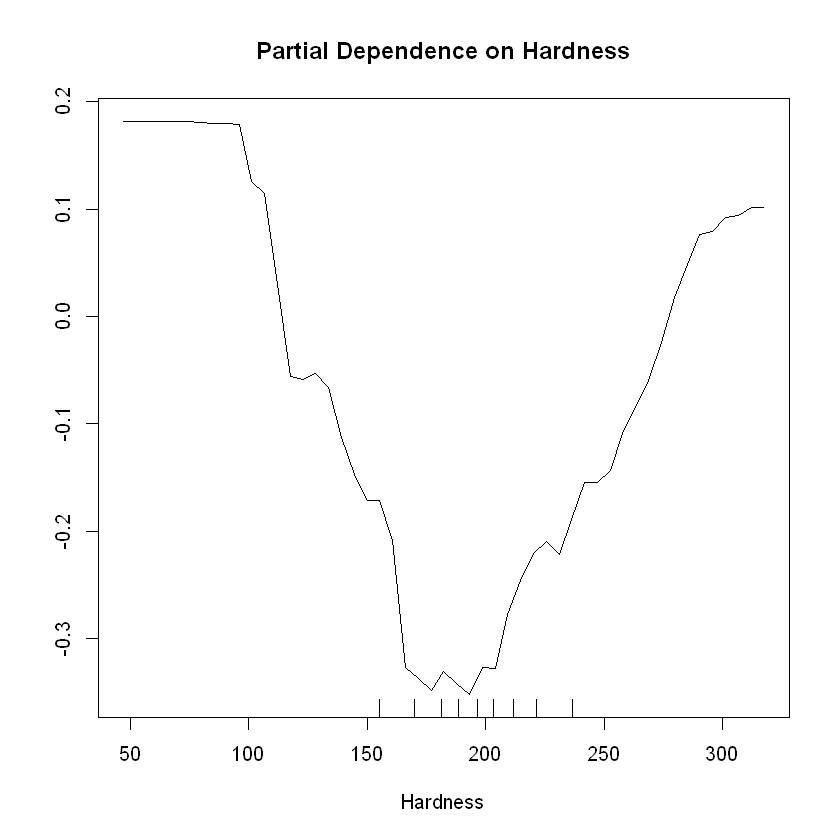

In [62]:
partialPlot(rf.model, train_set, Hardness, 1)

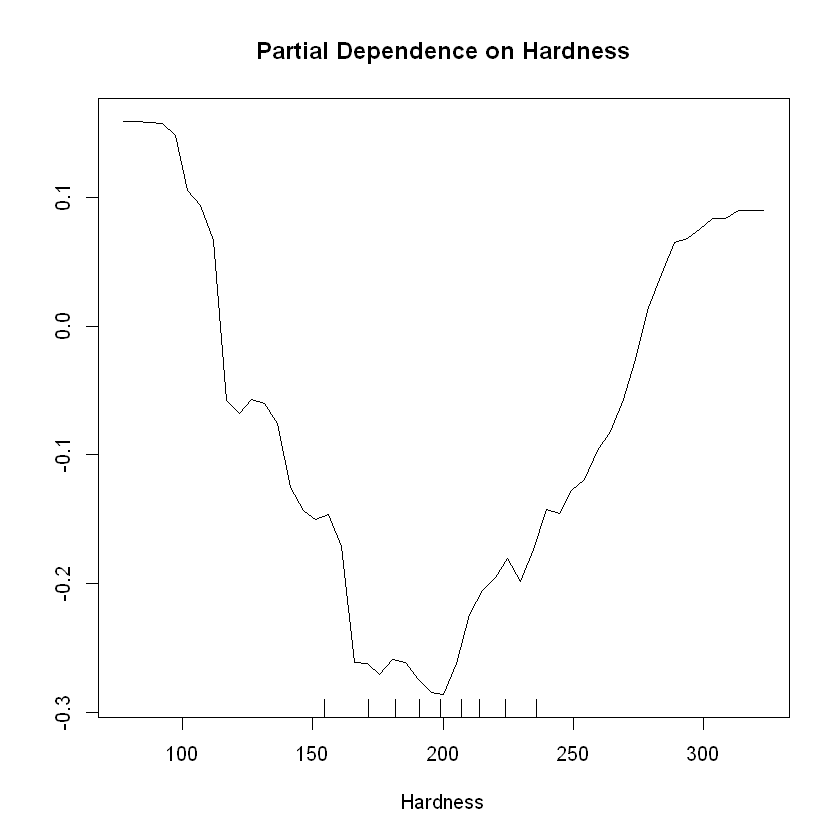

In [63]:
partialPlot(rf.model, test_set, Hardness, 1)

According to this model the general trend is that the potability of the water samples go down from the 100mg/L mark to 200mg/L mark, with it increasing again from the 200mg/L mark to 300mg/L. This shows that for extremely low or high values of hardness, our water samples are most probably potable. However, we should not take these number at face value as they are many other factors at play that could be contributing to the poor drinking water quality.

Another interesting observation is that, the source of this dataset has not given us any information about whether the water bodies from which this information was obtained were naturally occurring or not. The range for non-potable samples pf water here, again, coincides with the values provided by the WHO ([Same source as before](https://cdn.who.int/media/docs/default-source/wash-documents/wash-chemicals/hardness2003.pdf)) for naturally occurring water bodies which could tell us that the naturally occurring sources of water are not considered potable by default. So, there could either be samples from artificial sources of water like water treatment plants, or samples from natural sources of water line ground water that could have gone through some amount of treatment which would be the reason why values outside this range have a higher coincidence with the potability of the water sample.

## Model: CART (Classification Trees)

Our CART model works best with the NA values removed, so we will be doing just that before proceeding with working on the dataset.

In [71]:
water.quality_na_dropped <- na.omit(water.quality_original)

In [72]:
# Split the data into training (80%) and testing (20%) sets
set.seed(530) # for reproducibility
train_index_80 <- createDataPartition(water.quality_na_dropped$Potability, p = 0.8, list = FALSE)
train_data_80 <- water.quality_na_dropped[train_index_80, ]
test_data_80 <- water.quality_na_dropped[-train_index_80, ]

In [73]:
set.seed(530) # for reproducibility
train_index_50 <- createDataPartition(water.quality_na_dropped$Potability, p = 0.5, list = FALSE)
train_data_50 <- water.quality_na_dropped[train_index_50, ]
test_data_50 <- water.quality_na_dropped[-train_index_50, ]

In [74]:
# Function to train and evaluate CART model
train_and_evaluate_CART <- function(train_data, test_data) {
  # Train the CART model
  cart_model <- rpart(Potability ~ ., data = train_data, method = "class")
  
  # Display the CART model
  print("CART Model:")
  print(cart_model)
  
  # Plot the CART model
  print("Plot of the CART Model:")
  rpart.plot(cart_model)
  
  # Predictions on the training data
  train_predictions <- predict(cart_model, train_data, type = "class")
  
  # Calculate training accuracy
  train_accuracy <- mean(train_predictions == train_data$Potability)
  print(paste("Training Accuracy:", train_accuracy))
  
  # Predictions on the testing data
  test_predictions <- predict(cart_model, test_data, type = "class")
  
  # Calculate testing accuracy
  test_accuracy <- mean(test_predictions == test_data$Potability)
  print(paste("Testing Accuracy:", test_accuracy))
  
  # Other metrics (e.g., confusion matrix)
  confusion_matrix <- table(test_data$Potability, test_predictions)
  print("Confusion Matrix:")
  print(confusion_matrix)
  
  # Calculate sensitivity, specificity, PPV, NPV for testing data
  TP <- confusion_matrix[2, 2]
  TN <- confusion_matrix[1, 1]
  FP <- confusion_matrix[1, 2]
  FN <- confusion_matrix[2, 1]
  
  sensitivity <- TP / (TP + FN) * 100
  specificity <- TN / (TN + FP) * 100
  PPV <- TP / (TP + FP) * 100
  NPV <- TN / (TN + FN) * 100
  
  print(paste("Testing Dataset:"))
  print(paste("Accuracy:", paste(round(test_accuracy * 100, 2), "%", sep = "")))
  print(paste("Sensitivity:", paste(round(sensitivity, 2), "%", sep = "")))
  print(paste("Specificity:", paste(round(specificity, 2), "%", sep = "")))
  print(paste("PPV:", paste(round(PPV, 2), "%", sep = "")))
  print(paste("NPV:", paste(round(NPV, 2), "%", sep = "")))
  
  # Calculate sensitivity, specificity, PPV, NPV for training data
  TP_train <- sum(train_data$Potability[train_predictions == "1"])
  TN_train <- sum(train_data$Potability[train_predictions == "0"] == "0")
  FP_train <- sum(train_data$Potability[train_predictions == "1"] == "0")
  FN_train <- sum(train_data$Potability[train_predictions == "0"])
  
  sensitivity_train <- TP_train / (TP_train + FN_train) * 100
  specificity_train <- TN_train / (TN_train + FP_train) * 100
  PPV_train <- TP_train / (TP_train + FP_train) * 100
  NPV_train <- TN_train / (TN_train + FN_train) * 100
  
  print(paste("Training Dataset:"))
  print(paste("Accuracy:", paste(round(train_accuracy * 100, 2), "%", sep = "")))
  print(paste("Sensitivity:", paste(round(sensitivity_train, 2), "%", sep = "")))
  print(paste("Specificity:", paste(round(specificity_train, 2), "%", sep = "")))
  print(paste("PPV:", paste(round(PPV_train, 2), "%", sep = "")))
  print(paste("NPV:", paste(round(NPV_train, 2), "%", sep = "")))
  
  # AUC and ROC curve
  pred <- predict(cart_model, test_data, type="prob")[,2]
  roc_obj <- prediction(pred, test_data$Potability)
  perf <- performance(roc_obj, "tpr", "fpr")
  auc <- performance(roc_obj, "auc")
  
  plot(perf, main="ROC Curve", col="blue", lwd=2)
  abline(a=0, b=1, lwd=2, lty=2, col="gray")
  print(paste("AUC:", auc@y.values[[1]]))
}

[1] "Results for 80-20 Split:"


[1] "CART Model:"
n= 1609 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1609 635 0 (0.60534493 0.39465507)  
   2) Sulfate>=260.7468 1548 590 0 (0.61886305 0.38113695)  
     4) Sulfate< 363.3467 1178 412 0 (0.65025467 0.34974533)  
       8) ph< 5.608885 172  31 0 (0.81976744 0.18023256) *
       9) ph>=5.608885 1006 381 0 (0.62127237 0.37872763)  
        18) Sulfate>=296.1368 840 294 0 (0.65000000 0.35000000)  
          36) Hardness>=164.2208 753 247 0 (0.67197875 0.32802125) *
          37) Hardness< 164.2208 87  40 1 (0.45977011 0.54022989)  
            74) Sulfate>=347.912 13   1 0 (0.92307692 0.07692308) *
            75) Sulfate< 347.912 74  28 1 (0.37837838 0.62162162) *
        19) Sulfate< 296.1368 166  79 1 (0.47590361 0.52409639)  
          38) Solids< 19369.7 62  20 0 (0.67741935 0.32258065) *
          39) Solids>=19369.7 104  37 1 (0.35576923 0.64423077)  
            78) Hardness>=204.7087 47  20 0 (0.57446809 0.42553191) *
         

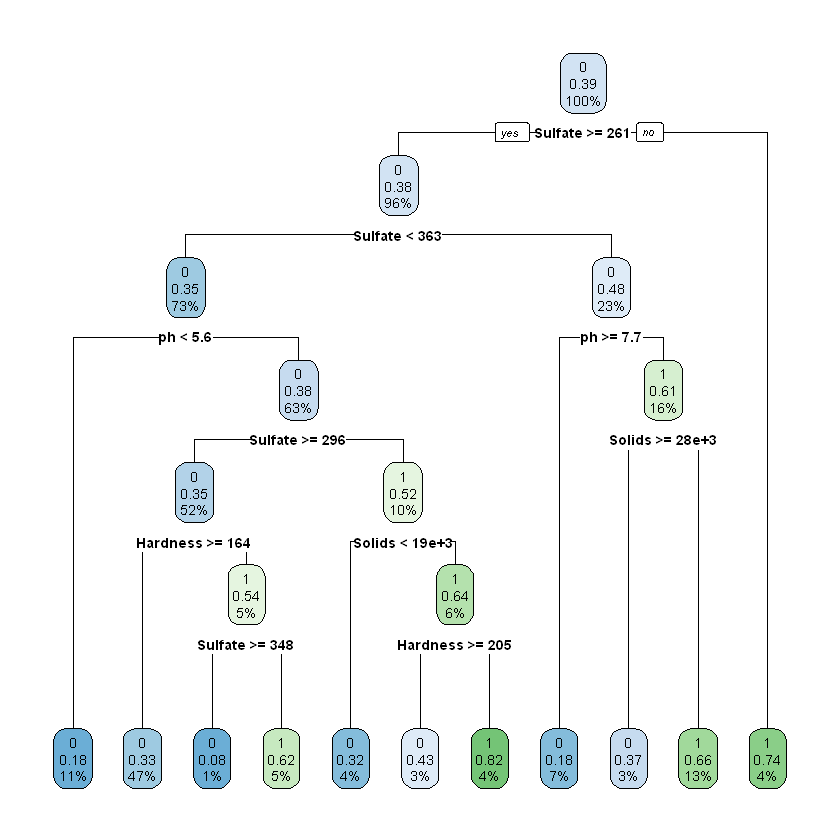

[1] "AUC: 0.615559633950121"


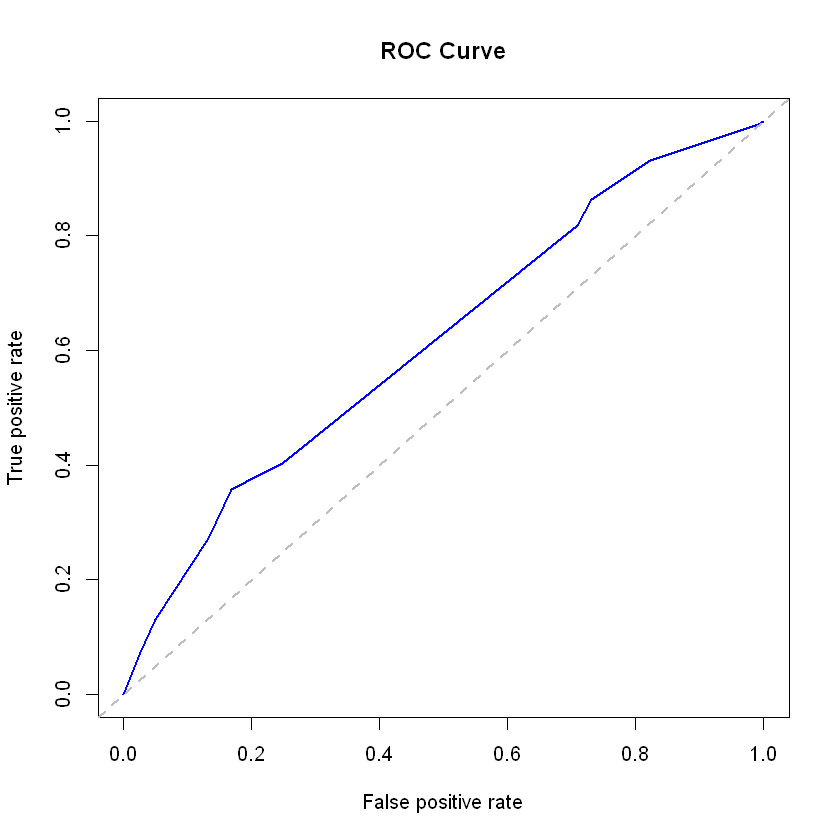

In [77]:
# Train and evaluate CART model with 80-20 split
print("Results for 80-20 Split:")
train_and_evaluate_CART(train_data_80, test_data_80)

[1] "Results for 50-50 Split:"


[1] "CART Model:"
n= 1006 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1006 393 0 (0.6093439 0.3906561)  
   2) Sulfate>=264.169 962 360 0 (0.6257796 0.3742204)  
     4) Sulfate< 373.869 821 287 0 (0.6504263 0.3495737)  
       8) Conductivity>=426.4658 400 117 0 (0.7075000 0.2925000)  
        16) Hardness>=158.9537 359  94 0 (0.7381616 0.2618384)  
          32) Solids< 34258.29 338  81 0 (0.7603550 0.2396450) *
          33) Solids>=34258.29 21   8 1 (0.3809524 0.6190476)  
            66) ph< 6.562323 8   2 0 (0.7500000 0.2500000) *
            67) ph>=6.562323 13   2 1 (0.1538462 0.8461538) *
        17) Hardness< 158.9537 41  18 1 (0.4390244 0.5609756)  
          34) Chloramines< 7.833074 22   8 0 (0.6363636 0.3636364) *
          35) Chloramines>=7.833074 19   4 1 (0.2105263 0.7894737) *
       9) Conductivity< 426.4658 421 170 0 (0.5961995 0.4038005)  
        18) Chloramines< 10.18707 411 161 0 (0.6082725 0.3917275) *
        19) Chloramines

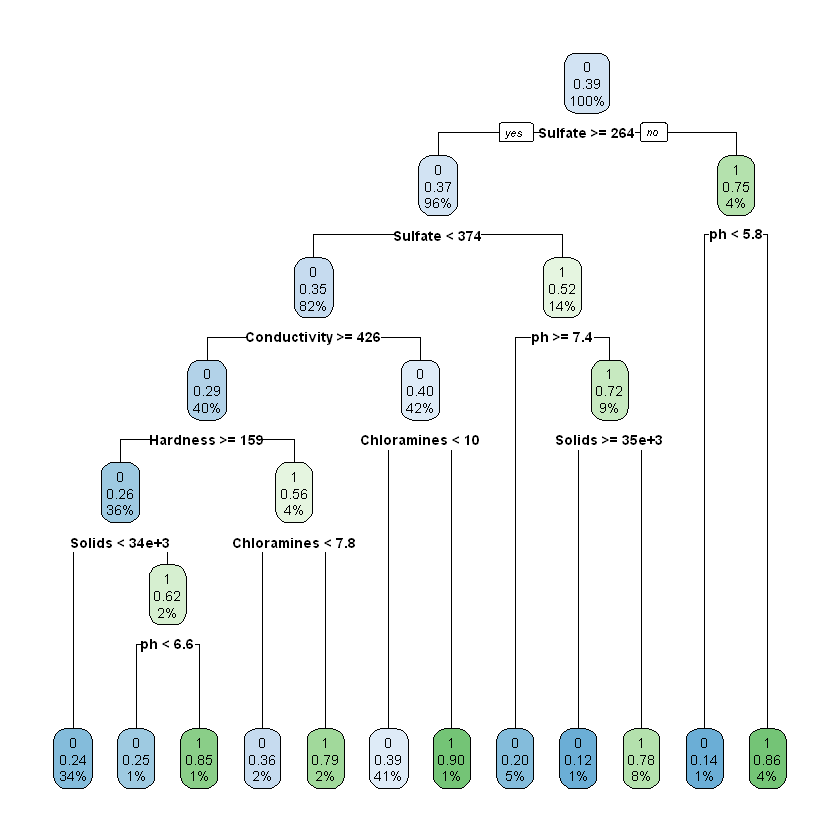

[1] "AUC: 0.541902708606734"


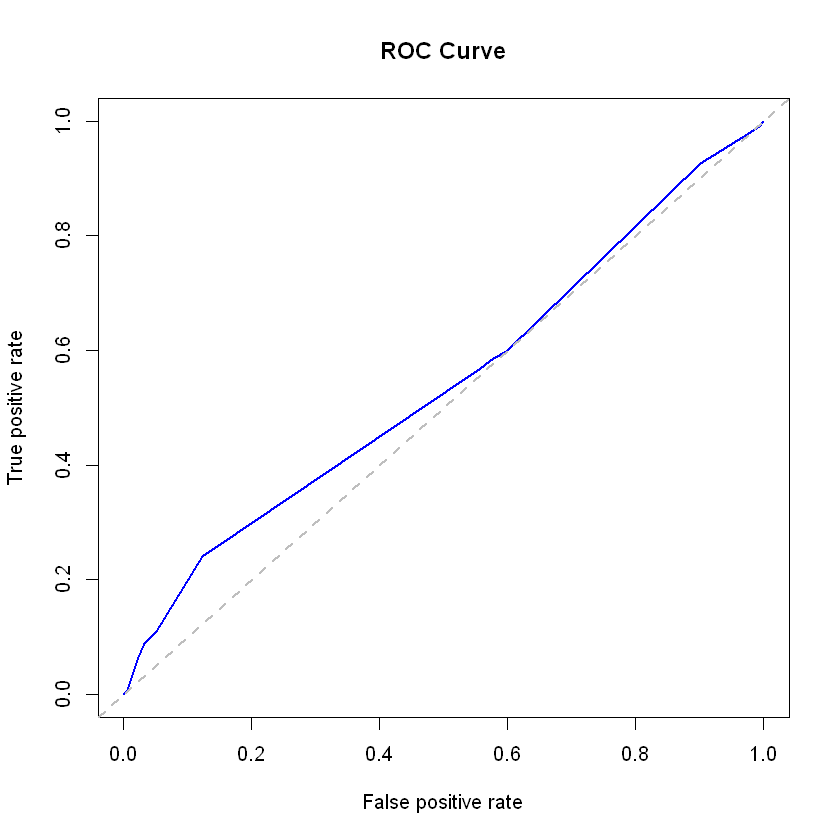

In [76]:
# Train and evaluate CART model with 50-50 split
print("Results for 50-50 Split:")
train_and_evaluate_CART(train_data_50, test_data_50)